<a href="https://colab.research.google.com/github/Anand-s-cmd/ML_Use_cases/blob/main/Hospital_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
import pandas as pd
import pandas as pd
#Univariate Analysis
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


In [ ]:
pd.pandas.set_option('display.max_columns',None)

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Hospital/Dataset.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(91713, 186)


In [ ]:
## print the top5 records
dataset.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [ ]:
df=dataset

In [ ]:
df3=df

In [ ]:
df3.shape

(91713, 186)

In [ ]:
#Lets drop Id's
df3.drop('encounter_id',inplace=True,axis=1)
df3.drop('patient_id',inplace=True,axis=1)
df3.drop('hospital_id',inplace=True,axis=1)

In [ ]:
df3.shape

(91713, 183)

In [ ]:
df3.columns# just check hospital_death columns 

Index(['hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity',
       'gender', 'height', 'hospital_admit_source', 'icu_admit_source',
       'icu_id',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=183)

In [ ]:
features_with_na=[features for features in df3.columns if df3[features].isnull().sum()>1]

In [ ]:
for feature in features_with_na:
    print(feature, np.round(df3[feature].isnull().mean()*100, 4),'%')

age 4.61 %
bmi 3.7388 %
ethnicity 1.521 %
gender 0.0273 %
height 1.4545 %
hospital_admit_source 23.3435 %
icu_admit_source 0.1221 %
weight 2.9658 %
albumin_apache 59.2926 %
apache_2_diagnosis 1.8122 %
apache_3j_diagnosis 1.2005 %
arf_apache 0.7796 %
bilirubin_apache 63.3869 %
bun_apache 21.0025 %
creatinine_apache 20.5565 %
fio2_apache 77.2715 %
gcs_eyes_apache 2.0728 %
gcs_motor_apache 2.0728 %
gcs_unable_apache 1.1307 %
gcs_verbal_apache 2.0728 %
glucose_apache 12.0332 %
heart_rate_apache 0.9573 %
hematocrit_apache 21.6741 %
intubated_apache 0.7796 %
map_apache 1.0838 %
paco2_apache 77.2715 %
paco2_for_ph_apache 77.2715 %
pao2_apache 77.2715 %
ph_apache 77.2715 %
resprate_apache 1.3455 %
sodium_apache 20.2807 %
temp_apache 4.4792 %
urineoutput_apache 53.4254 %
ventilated_apache 0.7796 %
wbc_apache 24.001 %
d1_diasbp_invasive_max 74.1269 %
d1_diasbp_invasive_min 74.1269 %
d1_diasbp_max 0.1799 %
d1_diasbp_min 0.1799 %
d1_diasbp_noninvasive_max 1.134 %
d1_diasbp_noninvasive_min 1.134 %


##Missing value analysis 

In [ ]:
# List of normalized Missing values 
#Step 1 Count missing values 
def missing_values_table(df):
        #Extract columns names first
        column=df3.columns

        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #Take the data types
        data_type = df.dtypes

        #Check all the values are having which DATA TYPES
        print(type(column), len(column))
        print(type(mis_val), len(mis_val))
        print(type(mis_val_percent), len(mis_val_percent))
        print(type(data_type), len(data_type))

        #(columns) is <class 'pandas.core.indexes.base.Index'> so we should convert it to Series using [idx.to_series()] method
        column1=column.to_series()

        print("After converting columns to series",type(column1))

        
        # Make a table with the results
        mis_val_table = pd.concat([column1, mis_val, mis_val_percent,data_type], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'column1', 1 : 'Missing Values', 2 : '% of Total Values',3:'Data_Types'})
        
        # Sort the table by percentage of missing descending
        #mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        #
        # WE SHOULD USE THIS CODE mis_val_table_ren_columns.iloc[:,1] != 0] BECAUSE THERE ARE FEW COLUMNS WHICH DOES NOT HAVE ANY SINGLE 0 VALUES
        # IF WE USE THIS CODE THEN THEY GET DROPPED SO BETTER WILL AVOID THIS CODE
        #
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values('% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(df3)

<class 'pandas.core.indexes.base.Index'> 183
<class 'pandas.core.series.Series'> 183
<class 'pandas.core.series.Series'> 183
<class 'pandas.core.series.Series'> 183
After converting columns to series <class 'pandas.core.series.Series'>
Your selected dataframe has 183 columns.
There are 183 columns that have missing values.


,column1,Missing Values,% of Total Values,Data_Types
h1_bilirubin_min,h1_bilirubin_min,84619,92.3,float64
h1_bilirubin_max,h1_bilirubin_max,84619,92.3,float64
h1_lactate_min,h1_lactate_min,84369,92.0,float64
h1_lactate_max,h1_lactate_max,84369,92.0,float64
h1_albumin_max,h1_albumin_max,83824,91.4,float64
h1_albumin_min,h1_albumin_min,83824,91.4,float64
h1_pao2fio2ratio_min,h1_pao2fio2ratio_min,80195,87.4,float64
h1_pao2fio2ratio_max,h1_pao2fio2ratio_max,80195,87.4,float64
h1_arterial_ph_min,h1_arterial_ph_min,76424,83.3,float64
h1_arterial_ph_max,h1_arterial_ph_max,76424,83.3,float64


In [ ]:
df_missing= missing_values_table(df3)

<class 'pandas.core.indexes.base.Index'> 183
<class 'pandas.core.series.Series'> 183
<class 'pandas.core.series.Series'> 183
<class 'pandas.core.series.Series'> 183
After converting columns to series <class 'pandas.core.series.Series'>
Your selected dataframe has 183 columns.
There are 183 columns that have missing values.


In [ ]:
type(df_missing)

pandas.core.frame.DataFrame

In [ ]:
df_missing.head(2)

,column1,Missing Values,% of Total Values,Data_Types
h1_bilirubin_min,h1_bilirubin_min,84619,92.3,float64
h1_bilirubin_max,h1_bilirubin_max,84619,92.3,float64


In [ ]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, h1_bilirubin_min to hospital_death
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   column1            183 non-null    object 
 1   Missing Values     183 non-null    int64  
 2   % of Total Values  183 non-null    float64
 3   Data_Types         183 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.1+ KB


In [ ]:
df_missing['Missing Values']=df_missing['Missing Values'].astype(int)
df_missing['% of Total Values']=df_missing['% of Total Values'].astype(int)

In [ ]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, h1_bilirubin_min to hospital_death
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   column1            183 non-null    object
 1   Missing Values     183 non-null    int64 
 2   % of Total Values  183 non-null    int64 
 3   Data_Types         183 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.1+ KB


##Now we have list of columns which have descending order missing values % so start dropping those

In [ ]:
#df_filtered = df[df['Age'] >= 25]
#print(df_filtered.head(15)
# Print the shape of the dataframe
#print(df_filtered.shape)

df_missing.drop(df_missing[df_missing['% of Total Values'] >= 80].index, inplace = True)

In [ ]:
df_missing.shape

(149, 4)

In [ ]:
df_missing.head()

,column1,Missing Values,% of Total Values,Data_Types
h1_hemaglobin_max,h1_hemaglobin_max,73123,79,float64
h1_hemaglobin_min,h1_hemaglobin_min,73123,79,float64
h1_sodium_min,h1_sodium_min,72617,79,float64
h1_sodium_max,h1_sodium_max,72617,79,float64
h1_potassium_min,h1_potassium_min,72102,78,float64


In [ ]:
df_missing.tail()

,column1,Missing Values,% of Total Values,Data_Types
icu_stay_type,icu_stay_type,0,0,object
icu_type,icu_type,0,0,object
readmission_status,readmission_status,0,0,int64
apache_post_operative,apache_post_operative,0,0,int64
hospital_death,hospital_death,0,0,int64


In [ ]:
#reset the index
df_missing=df_missing.reset_index(drop=True)

In [ ]:
df_missing.head()

,column1,Missing Values,% of Total Values,Data_Types
0,h1_hemaglobin_max,73123,79,float64
1,h1_hemaglobin_min,73123,79,float64
2,h1_sodium_min,72617,79,float64
3,h1_sodium_max,72617,79,float64
4,h1_potassium_min,72102,78,float64


In [ ]:
df_missing['column1'].values

array(['h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_sodium_min',
       'h1_sodium_max', 'h1_potassium_min', 'h1_potassium_max',
       'fio2_apache', 'ph_apache', 'paco2_apache', 'pao2_apache',
       'paco2_for_ph_apache', 'd1_lactate_max', 'd1_lactate_min',
       'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_sysbp_invasive_min', 'd1_sysbp_invasive_max',
       'd1_mbp_invasive_max', 'd1_mbp_invasive_min',
       'd1_pao2fio2ratio_min', 'd1_pao2fio2ratio_max',
       'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_pco2_min',
       'd1_arterial_pco2_max', 'd1_arterial_po2_min',
       'd1_arterial_po2_max', 'bilirubin_apache', 'h1_inr_min',
       'h1_inr_max', 'd1_inr_max', 'd1_inr_min', 'albumin_apache',
       'd1_bilirubin_max', 'd1_bilirubin_min', 'h1_glucose_max',
       'h1_glucose_min', 'd1_albumin_min', 'd1_albumin_max',
       'urineoutput_apache', 'wbc_apache', 'h1_temp_min', 'h1_temp_max',
       'hospital_admit_source', 'hematocrit_apache', 'b

In [ ]:
len(df_missing['column1'].values)

149

## considering the "mis_val_table_ren_columns" dataframe's first column that is COLUMNS 
#because after deleting all the values which are having more than 80% missing values now we should only consider 
# the columns that is dataframes columns list in the list values so we can take these columns list in df3 dataframe


In [ ]:
after_removed_column_list=df_missing['column1'].values

In [ ]:
type(after_removed_column_list)

numpy.ndarray

In [ ]:
df4=df

In [ ]:
df4[after_removed_column_list].head()

,h1_hemaglobin_max,h1_hemaglobin_min,h1_sodium_min,h1_sodium_max,h1_potassium_min,h1_potassium_max,fio2_apache,ph_apache,paco2_apache,pao2_apache,paco2_for_ph_apache,d1_lactate_max,d1_lactate_min,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_sysbp_invasive_min,d1_sysbp_invasive_max,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_pao2fio2ratio_min,d1_pao2fio2ratio_max,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_pco2_min,d1_arterial_pco2_max,d1_arterial_po2_min,d1_arterial_po2_max,bilirubin_apache,h1_inr_min,h1_inr_max,d1_inr_max,d1_inr_min,albumin_apache,d1_bilirubin_max,d1_bilirubin_min,h1_glucose_max,h1_glucose_min,d1_albumin_min,d1_albumin_max,urineoutput_apache,wbc_apache,h1_temp_min,h1_temp_max,hospital_admit_source,hematocrit_apache,bun_apache,creatinine_apache,sodium_apache,d1_hco3_max,d1_hco3_min,d1_platelets_min,d1_platelets_max,d1_wbc_min,d1_wbc_max,d1_calcium_min,d1_calcium_max,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_min,d1_hematocrit_max,glucose_apache,d1_bun_min,d1_bun_max,d1_sodium_min,d1_sodium_max,d1_creatinine_max,d1_creatinine_min,d1_potassium_min,d1_potassium_max,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,apache_4a_icu_death_prob,apache_4a_hospital_death_prob,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_min,d1_glucose_max,h1_mbp_min,h1_mbp_max,h1_resprate_min,h1_resprate_max,age,h1_spo2_min,h1_spo2_max,temp_apache,h1_diasbp_min,h1_diasbp_max,h1_sysbp_min,h1_sysbp_max,bmi,h1_heartrate_min,h1_heartrate_max,weight,d1_temp_min,d1_temp_max,gcs_verbal_apache,gcs_motor_apache,gcs_eyes_apache,apache_3j_bodysystem,apache_2_bodysystem,apache_2_diagnosis,d1_mbp_noninvasive_min,d1_mbp_noninvasive_max,ethnicity,height,resprate_apache,apache_3j_diagnosis,d1_diasbp_noninvasive_min,d1_diasbp_noninvasive_max,gcs_unable_apache,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,map_apache,heart_rate_apache,diabetes_mellitus,solid_tumor_with_metastasis,cirrhosis,aids,immunosuppression,leukemia,ventilated_apache,intubated_apache,arf_apache,lymphoma,hepatic_failure,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_mbp_min,d1_mbp_max,d1_diasbp_max,d1_diasbp_min,d1_sysbp_max,d1_sysbp_min,d1_heartrate_max,d1_heartrate_min,icu_admit_source,gender,elective_surgery,pre_icu_los_days,icu_id,icu_stay_type,icu_type,readmission_status,apache_post_operative,hospital_death
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1.0,46.0,32.0,64.0,122.0,66.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,2.3,0.4,0.4,NaN,NaN,2.3,2.3,NaN,14.1,37.5,39.5,Floor,27.4,31.0,2.51,134.0,19.0,15.0,233.0,233.0,14.1,14.1,7.4,8.5,8.9,8.9,27.4,27.4,168.0,30.0,31.0,134.0,136.0,2.51,2.23,3.4,4.0,86.0,85.0,0.05,0.10,68.0,63.0,131.0,115.0,109.0,168.0,85.0,86.0,18.0,26.0,68.0,74.0,100.0,39.3,63.0,68.0,115.0,131.0,22.73,108.0,119.0,73.9,37.2,39.9,4.0,6.0,3.0,Sepsis,Cardiovascular,113.0,46.0,89.0,Caucasian,180.3,36.0,502.01,37.0,68.0,0.0,131.0,73.0,40.0,118.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,10.0,100.0,74.0,46.0,89.0,68.0,37.0,131.0,73.0,119.0,72.0,Floor,M,0,0.541667,92,admit,CTICU,0,0,0
1,11.3,11.3,145.0,145.0,4.2,4.2,1.0,7.45,37.0,51.0,37.0,3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,54.8,7.45,7.45,37.0,37.0,51.0,51.0,NaN,1.3,1.3,1.3,1.3,NaN,0.5,0.5,145.0,143.0,1.6,1.6,NaN,12.7,36.3,36.3,Floor,36.9,9.0,0.56,145.0,27.0,26.0,487.0,557.0,12.7,23.3,8.0,8.6,11.3,11.1,36.1,36.9,145.0,9.0,11.0,145.0,145.0,0.71,0.56,3.8,4.2,85.0,57.0,0.29,0.47,61.0,48.0,95.0,71.0,128.0,145.0,57.0,85.0,28.0,31.0,77.0,70.0,95.0,35.1,48.0,61.0,71.0,95.0,27.42,100.0,114.0,70.2,35.1,36.3,1.0,3.0,1.0,Respiratory,Respiratory,108.0,38.0,120.0,Caucasian,160.0,33.0,203.01,31.0,95.0,0.0,159.0,67.0,46.0,120.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32.0,12.0,100.0,70.0,38.0,120.0,95.0,31.0,159.0,67.0,118.0,72.0,Floor,F,0,0.927778,90,admit,Med-Surg ICU,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
df5=df4[after_removed_column_list]

In [ ]:
df5.shape

(91713, 149)

In [ ]:
df5.columns

Index(['h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_sodium_min',
       'h1_sodium_max', 'h1_potassium_min', 'h1_potassium_max', 'fio2_apache',
       'ph_apache', 'paco2_apache', 'pao2_apache',
       ...
       'icu_admit_source', 'gender', 'elective_surgery', 'pre_icu_los_days',
       'icu_id', 'icu_stay_type', 'icu_type', 'readmission_status',
       'apache_post_operative', 'hospital_death'],
      dtype='object', length=149)

# Data Analysis We will Analyze To Find out the below stuff

# Missing Values

## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values

In [ ]:
features_with_na=[features for features in df5.columns if df5[features].isnull().sum()>1]

In [ ]:
type(features_with_na)

list

In [ ]:
for feature in features_with_na:
    print(feature, np.round(df5[feature].isnull().mean()*100, 4),'%')

h1_hemaglobin_max 79.7302 %
h1_hemaglobin_min 79.7302 %
h1_sodium_min 79.1785 %
h1_sodium_max 79.1785 %
h1_potassium_min 78.617 %
h1_potassium_max 78.617 %
fio2_apache 77.2715 %
ph_apache 77.2715 %
paco2_apache 77.2715 %
pao2_apache 77.2715 %
paco2_for_ph_apache 77.2715 %
d1_lactate_max 74.5761 %
d1_lactate_min 74.5761 %
d1_diasbp_invasive_max 74.1269 %
d1_diasbp_invasive_min 74.1269 %
d1_sysbp_invasive_min 74.0996 %
d1_sysbp_invasive_max 74.0996 %
d1_mbp_invasive_max 73.9012 %
d1_mbp_invasive_min 73.9012 %
d1_pao2fio2ratio_min 71.9723 %
d1_pao2fio2ratio_max 71.9723 %
d1_arterial_ph_max 65.5556 %
d1_arterial_ph_min 65.5556 %
d1_arterial_pco2_min 64.6266 %
d1_arterial_pco2_max 64.6266 %
d1_arterial_po2_min 64.6168 %
d1_arterial_po2_max 64.6168 %
bilirubin_apache 63.3869 %
h1_inr_min 63.1764 %
h1_inr_max 63.1764 %
d1_inr_max 63.1764 %
d1_inr_min 63.1764 %
albumin_apache 59.2926 %
d1_bilirubin_max 58.5228 %
d1_bilirubin_min 58.5228 %
h1_glucose_max 57.3681 %
h1_glucose_min 57.3681 %
d1_al

#Numerical Variables

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in df5.columns if df5[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df5[numerical_features].head()


Number of numerical variables:  141


,h1_hemaglobin_max,h1_hemaglobin_min,h1_sodium_min,h1_sodium_max,h1_potassium_min,h1_potassium_max,fio2_apache,ph_apache,paco2_apache,pao2_apache,paco2_for_ph_apache,d1_lactate_max,d1_lactate_min,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_sysbp_invasive_min,d1_sysbp_invasive_max,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_pao2fio2ratio_min,d1_pao2fio2ratio_max,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_pco2_min,d1_arterial_pco2_max,d1_arterial_po2_min,d1_arterial_po2_max,bilirubin_apache,h1_inr_min,h1_inr_max,d1_inr_max,d1_inr_min,albumin_apache,d1_bilirubin_max,d1_bilirubin_min,h1_glucose_max,h1_glucose_min,d1_albumin_min,d1_albumin_max,urineoutput_apache,wbc_apache,h1_temp_min,h1_temp_max,hematocrit_apache,bun_apache,creatinine_apache,sodium_apache,d1_hco3_max,d1_hco3_min,d1_platelets_min,d1_platelets_max,d1_wbc_min,d1_wbc_max,d1_calcium_min,d1_calcium_max,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_min,d1_hematocrit_max,glucose_apache,d1_bun_min,d1_bun_max,d1_sodium_min,d1_sodium_max,d1_creatinine_max,d1_creatinine_min,d1_potassium_min,d1_potassium_max,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,apache_4a_icu_death_prob,apache_4a_hospital_death_prob,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_min,d1_glucose_max,h1_mbp_min,h1_mbp_max,h1_resprate_min,h1_resprate_max,age,h1_spo2_min,h1_spo2_max,temp_apache,h1_diasbp_min,h1_diasbp_max,h1_sysbp_min,h1_sysbp_max,bmi,h1_heartrate_min,h1_heartrate_max,weight,d1_temp_min,d1_temp_max,gcs_verbal_apache,gcs_motor_apache,gcs_eyes_apache,apache_2_diagnosis,d1_mbp_noninvasive_min,d1_mbp_noninvasive_max,height,resprate_apache,apache_3j_diagnosis,d1_diasbp_noninvasive_min,d1_diasbp_noninvasive_max,gcs_unable_apache,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,map_apache,heart_rate_apache,diabetes_mellitus,solid_tumor_with_metastasis,cirrhosis,aids,immunosuppression,leukemia,ventilated_apache,intubated_apache,arf_apache,lymphoma,hepatic_failure,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_mbp_min,d1_mbp_max,d1_diasbp_max,d1_diasbp_min,d1_sysbp_max,d1_sysbp_min,d1_heartrate_max,d1_heartrate_min,elective_surgery,pre_icu_los_days,icu_id,readmission_status,apache_post_operative,hospital_death
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1.0,46.0,32.0,64.0,122.0,66.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,2.3,0.4,0.4,NaN,NaN,2.3,2.3,NaN,14.1,37.5,39.5,27.4,31.0,2.51,134.0,19.0,15.0,233.0,233.0,14.1,14.1,7.4,8.5,8.9,8.9,27.4,27.4,168.0,30.0,31.0,134.0,136.0,2.51,2.23,3.4,4.0,86.0,85.0,0.05,0.10,68.0,63.0,131.0,115.0,109.0,168.0,85.0,86.0,18.0,26.0,68.0,74.0,100.0,39.3,63.0,68.0,115.0,131.0,22.73,108.0,119.0,73.9,37.2,39.9,4.0,6.0,3.0,113.0,46.0,89.0,180.3,36.0,502.01,37.0,68.0,0.0,131.0,73.0,40.0,118.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,10.0,100.0,74.0,46.0,89.0,68.0,37.0,131.0,73.0,119.0,72.0,0,0.541667,92,0,0,0
1,11.3,11.3,145.0,145.0,4.2,4.2,1.0,7.45,37.0,51.0,37.0,3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,54.8,7.45,7.45,37.0,37.0,51.0,51.0,NaN,1.3,1.3,1.3,1.3,NaN,0.5,0.5,145.0,143.0,1.6,1.6,NaN,12.7,36.3,36.3,36.9,9.0,0.56,145.0,27.0,26.0,487.0,557.0,12.7,23.3,8.0,8.6,11.3,11.1,36.1,36.9,145.0,9.0,11.0,145.0,145.0,0.71,0.56,3.8,4.2,85.0,57.0,0.29,0.47,61.0,48.0,95.0,71.0,128.0,145.0,57.0,85.0,28.0,31.0,77.0,70.0,95.0,35.1,48.0,61.0,71.0,95.0,27.42,100.0,114.0,70.2,35.1,36.3,1.0,3.0,1.0,108.0,38.0,120.0,160.0,33.0,203.01,31.0,95.0,0.0,159.0,67.0,46.0,120.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32.0,12.0,100.0,70.0,38.0,120.0,95.0,31.0,159.0,67.0,118.0,72.0,0,0.927778,90,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.7,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,83.0,0.00,0.00,88.0,58.0,148.0,124.0,NaN,NaN,83.0,91.0,16.0,20.0,25.0,91.0,98.0,36.7,58.0,88.0,1

In [ ]:
df5.head()

,h1_hemaglobin_max,h1_hemaglobin_min,h1_sodium_min,h1_sodium_max,h1_potassium_min,h1_potassium_max,fio2_apache,ph_apache,paco2_apache,pao2_apache,paco2_for_ph_apache,d1_lactate_max,d1_lactate_min,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_sysbp_invasive_min,d1_sysbp_invasive_max,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_pao2fio2ratio_min,d1_pao2fio2ratio_max,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_pco2_min,d1_arterial_pco2_max,d1_arterial_po2_min,d1_arterial_po2_max,bilirubin_apache,h1_inr_min,h1_inr_max,d1_inr_max,d1_inr_min,albumin_apache,d1_bilirubin_max,d1_bilirubin_min,h1_glucose_max,h1_glucose_min,d1_albumin_min,d1_albumin_max,urineoutput_apache,wbc_apache,h1_temp_min,h1_temp_max,hospital_admit_source,hematocrit_apache,bun_apache,creatinine_apache,sodium_apache,d1_hco3_max,d1_hco3_min,d1_platelets_min,d1_platelets_max,d1_wbc_min,d1_wbc_max,d1_calcium_min,d1_calcium_max,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_min,d1_hematocrit_max,glucose_apache,d1_bun_min,d1_bun_max,d1_sodium_min,d1_sodium_max,d1_creatinine_max,d1_creatinine_min,d1_potassium_min,d1_potassium_max,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,apache_4a_icu_death_prob,apache_4a_hospital_death_prob,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_min,d1_glucose_max,h1_mbp_min,h1_mbp_max,h1_resprate_min,h1_resprate_max,age,h1_spo2_min,h1_spo2_max,temp_apache,h1_diasbp_min,h1_diasbp_max,h1_sysbp_min,h1_sysbp_max,bmi,h1_heartrate_min,h1_heartrate_max,weight,d1_temp_min,d1_temp_max,gcs_verbal_apache,gcs_motor_apache,gcs_eyes_apache,apache_3j_bodysystem,apache_2_bodysystem,apache_2_diagnosis,d1_mbp_noninvasive_min,d1_mbp_noninvasive_max,ethnicity,height,resprate_apache,apache_3j_diagnosis,d1_diasbp_noninvasive_min,d1_diasbp_noninvasive_max,gcs_unable_apache,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,map_apache,heart_rate_apache,diabetes_mellitus,solid_tumor_with_metastasis,cirrhosis,aids,immunosuppression,leukemia,ventilated_apache,intubated_apache,arf_apache,lymphoma,hepatic_failure,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_mbp_min,d1_mbp_max,d1_diasbp_max,d1_diasbp_min,d1_sysbp_max,d1_sysbp_min,d1_heartrate_max,d1_heartrate_min,icu_admit_source,gender,elective_surgery,pre_icu_los_days,icu_id,icu_stay_type,icu_type,readmission_status,apache_post_operative,hospital_death
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1.0,46.0,32.0,64.0,122.0,66.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,2.3,0.4,0.4,NaN,NaN,2.3,2.3,NaN,14.1,37.5,39.5,Floor,27.4,31.0,2.51,134.0,19.0,15.0,233.0,233.0,14.1,14.1,7.4,8.5,8.9,8.9,27.4,27.4,168.0,30.0,31.0,134.0,136.0,2.51,2.23,3.4,4.0,86.0,85.0,0.05,0.10,68.0,63.0,131.0,115.0,109.0,168.0,85.0,86.0,18.0,26.0,68.0,74.0,100.0,39.3,63.0,68.0,115.0,131.0,22.73,108.0,119.0,73.9,37.2,39.9,4.0,6.0,3.0,Sepsis,Cardiovascular,113.0,46.0,89.0,Caucasian,180.3,36.0,502.01,37.0,68.0,0.0,131.0,73.0,40.0,118.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,10.0,100.0,74.0,46.0,89.0,68.0,37.0,131.0,73.0,119.0,72.0,Floor,M,0,0.541667,92,admit,CTICU,0,0,0
1,11.3,11.3,145.0,145.0,4.2,4.2,1.0,7.45,37.0,51.0,37.0,3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,54.8,7.45,7.45,37.0,37.0,51.0,51.0,NaN,1.3,1.3,1.3,1.3,NaN,0.5,0.5,145.0,143.0,1.6,1.6,NaN,12.7,36.3,36.3,Floor,36.9,9.0,0.56,145.0,27.0,26.0,487.0,557.0,12.7,23.3,8.0,8.6,11.3,11.1,36.1,36.9,145.0,9.0,11.0,145.0,145.0,0.71,0.56,3.8,4.2,85.0,57.0,0.29,0.47,61.0,48.0,95.0,71.0,128.0,145.0,57.0,85.0,28.0,31.0,77.0,70.0,95.0,35.1,48.0,61.0,71.0,95.0,27.42,100.0,114.0,70.2,35.1,36.3,1.0,3.0,1.0,Respiratory,Respiratory,108.0,38.0,120.0,Caucasian,160.0,33.0,203.01,31.0,95.0,0.0,159.0,67.0,46.0,120.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32.0,12.0,100.0,70.0,38.0,120.0,95.0,31.0,159.0,67.0,118.0,72.0,Floor,F,0,0.927778,90,admit,Med-Surg ICU,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
type(numerical_features)

list

In [ ]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

[]

## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables


In [ ]:
discrete_feature=[feature for feature in numerical_features if len(df5[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 19


In [ ]:
discrete_feature

['gcs_verbal_apache',
 'gcs_motor_apache',
 'gcs_eyes_apache',
 'gcs_unable_apache',
 'diabetes_mellitus',
 'solid_tumor_with_metastasis',
 'cirrhosis',
 'aids',
 'immunosuppression',
 'leukemia',
 'ventilated_apache',
 'intubated_apache',
 'arf_apache',
 'lymphoma',
 'hepatic_failure',
 'elective_surgery',
 'readmission_status',
 'apache_post_operative',
 'hospital_death']

In [ ]:
dataset[discrete_feature].head()

,gcs_verbal_apache,gcs_motor_apache,gcs_eyes_apache,gcs_unable_apache,diabetes_mellitus,solid_tumor_with_metastasis,cirrhosis,aids,immunosuppression,leukemia,ventilated_apache,intubated_apache,arf_apache,lymphoma,hepatic_failure,elective_surgery,readmission_status,apache_post_operative,hospital_death
0,4.0,6.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0
2,5.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,5.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0,1,0
4,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['encounter_id'+'patient_id	']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 122


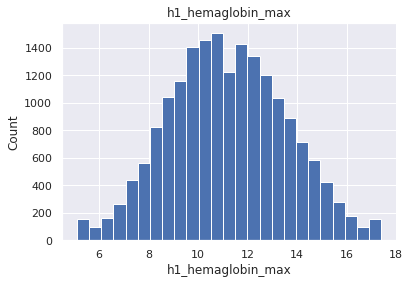

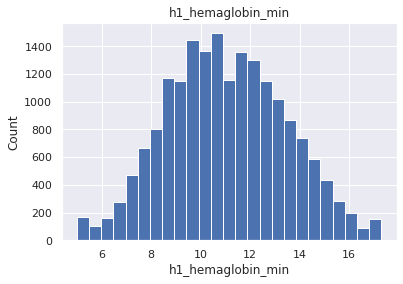

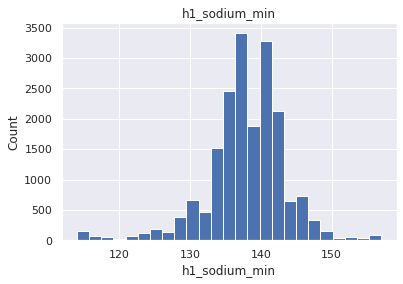

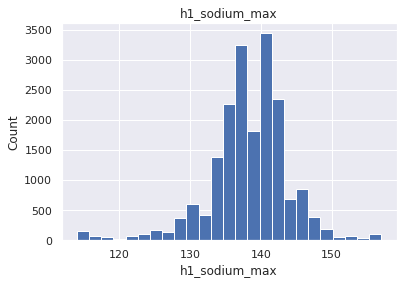

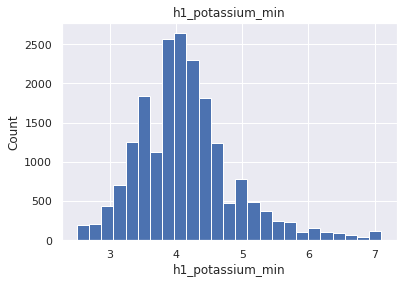

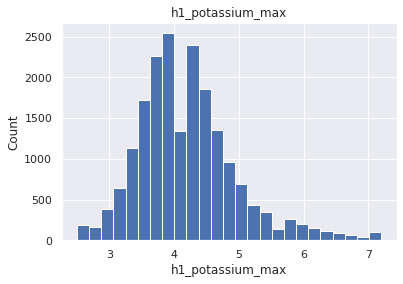

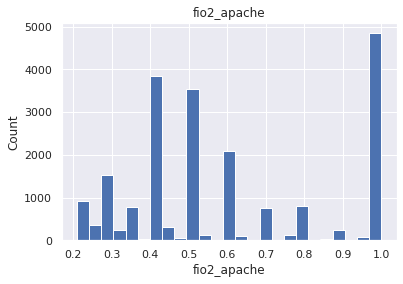

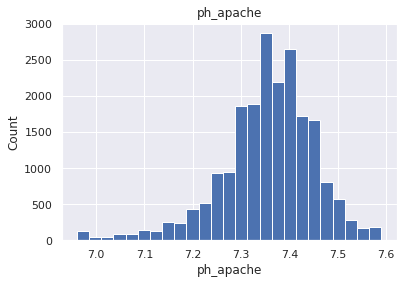

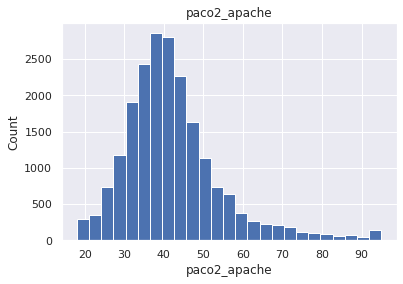

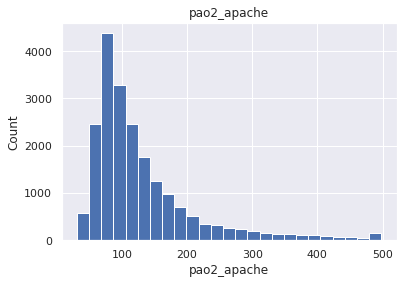

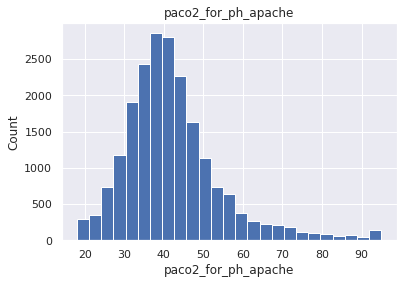

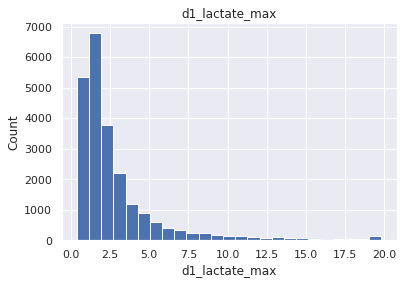

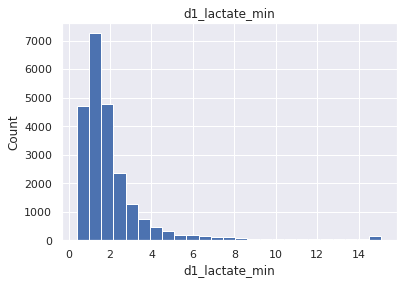

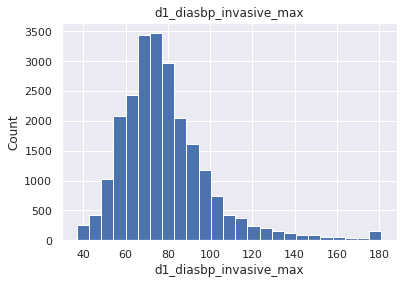

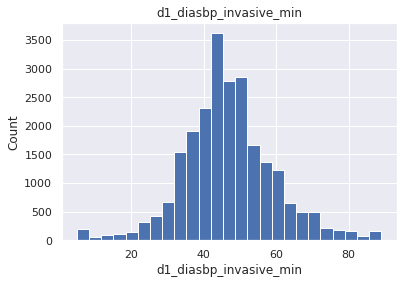

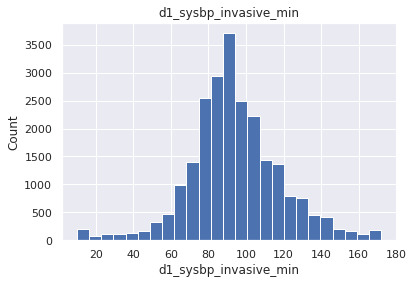

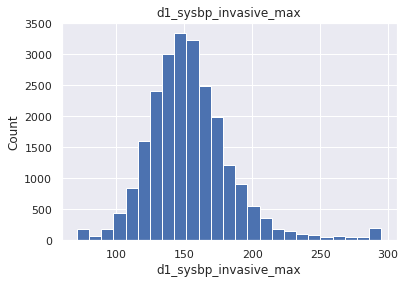

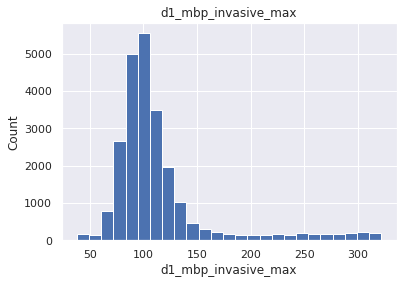

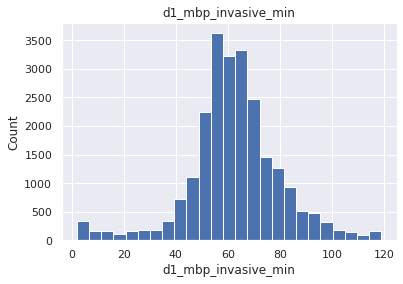

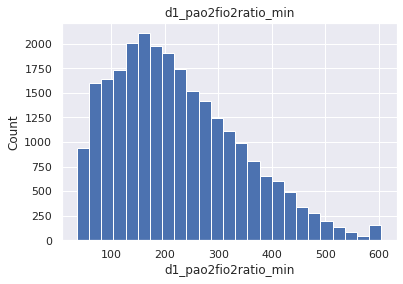

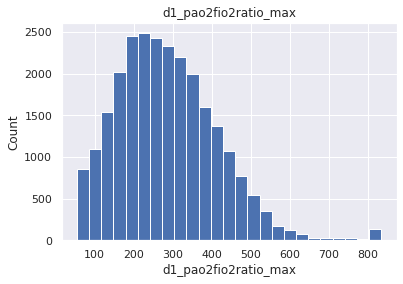

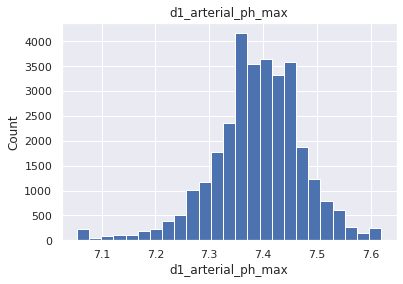

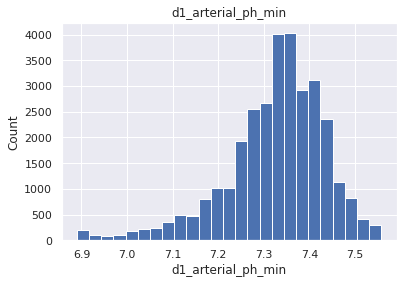

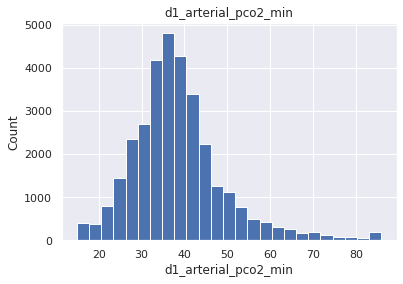

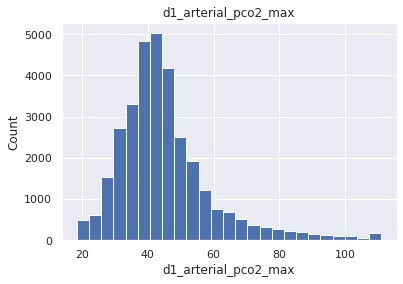

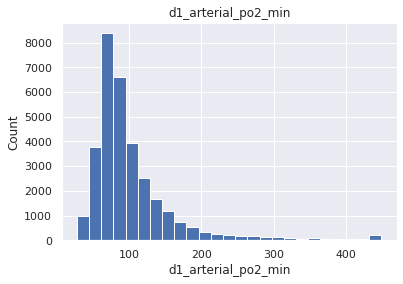

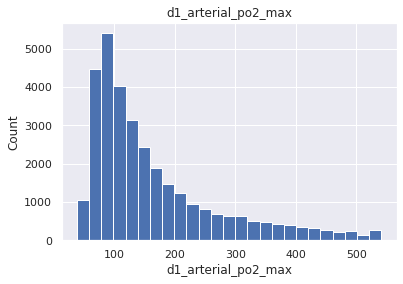

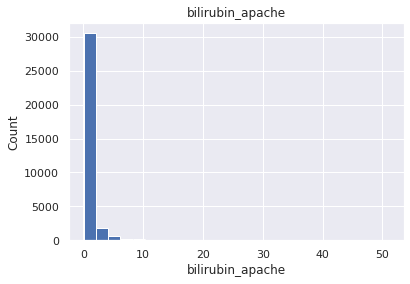

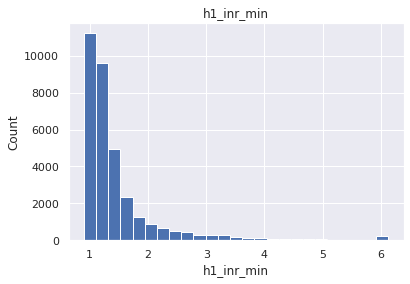

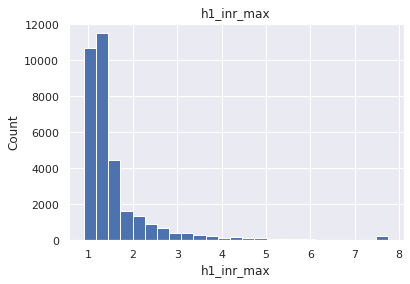

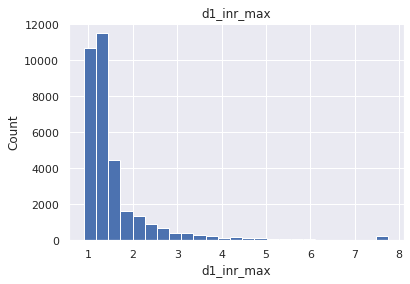

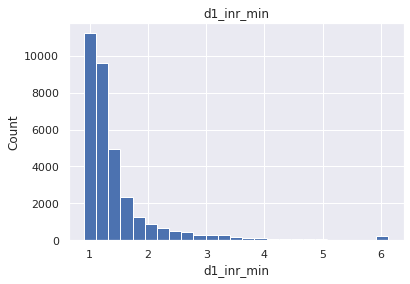

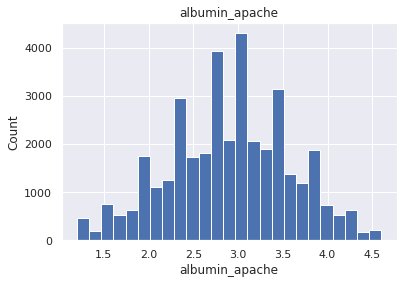

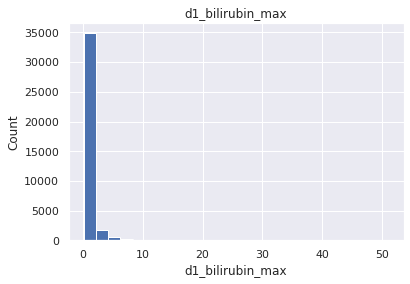

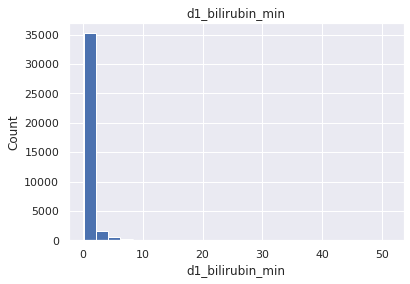

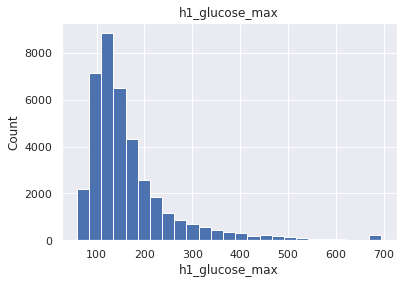

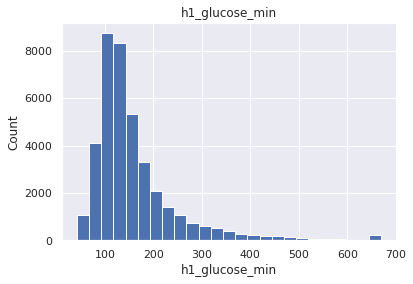

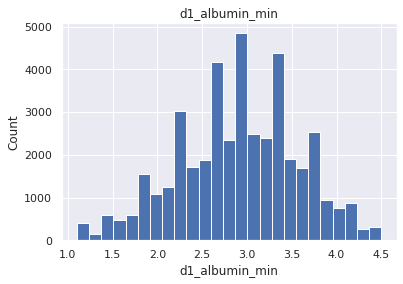

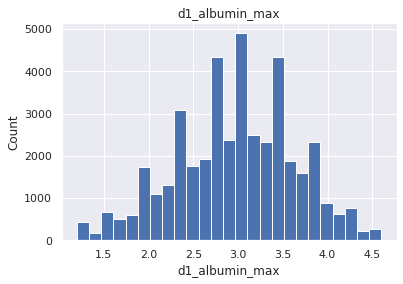

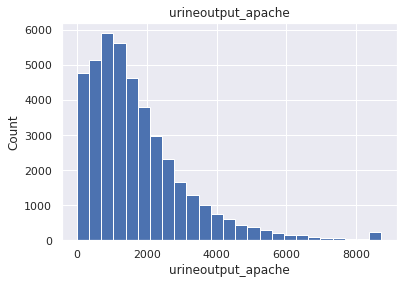

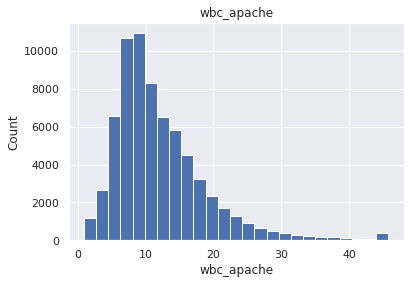

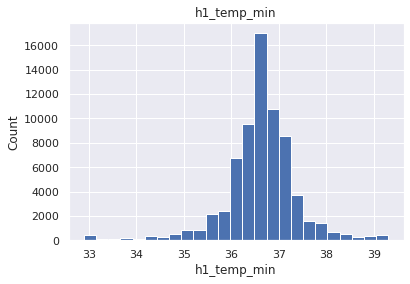

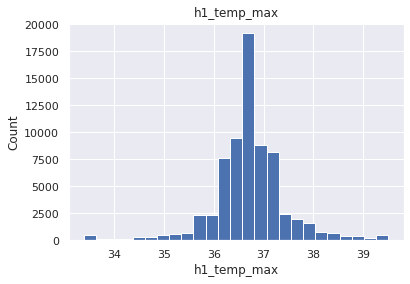

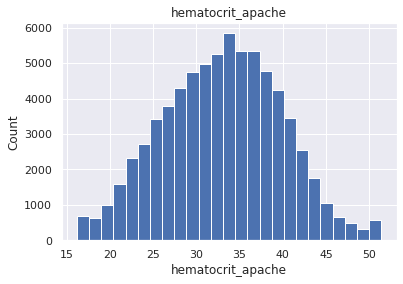

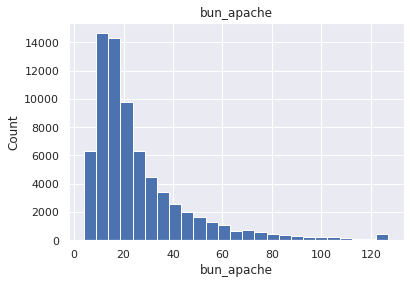

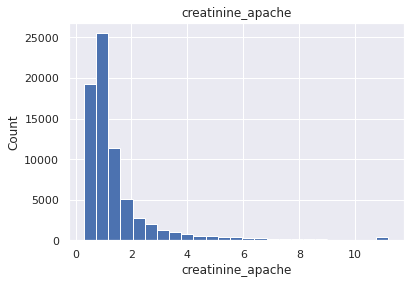

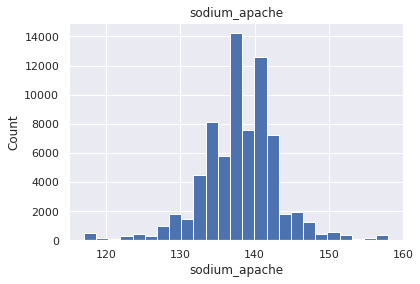

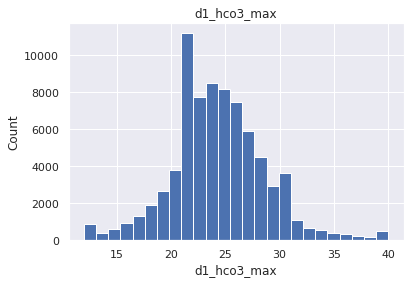

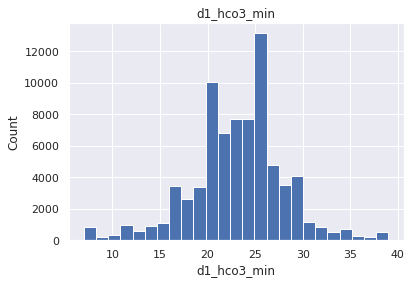

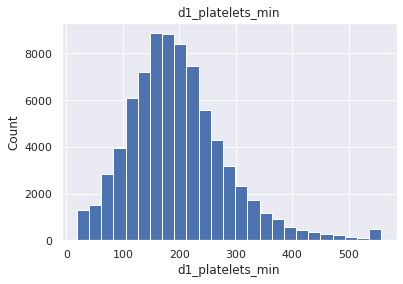

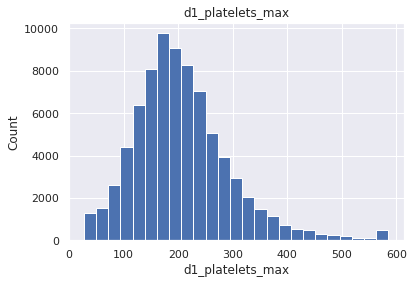

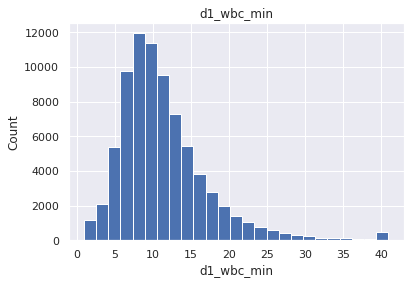

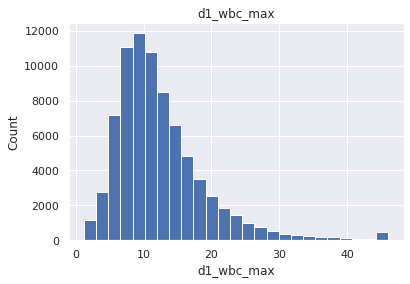

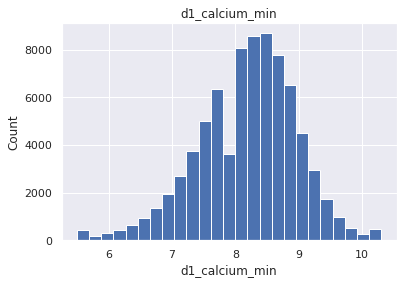

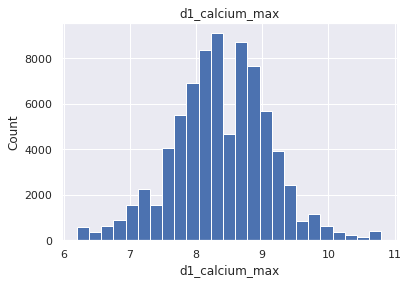

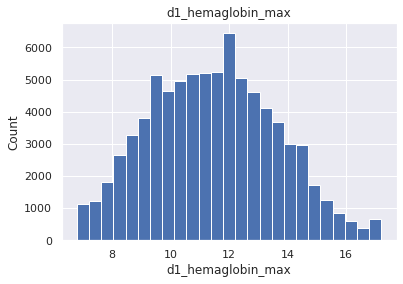

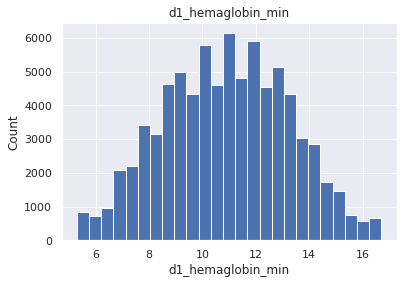

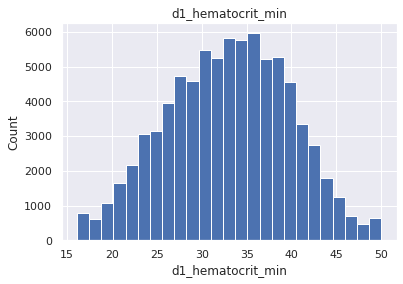

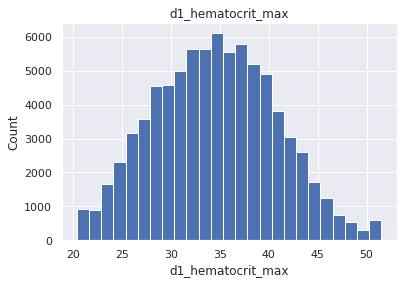

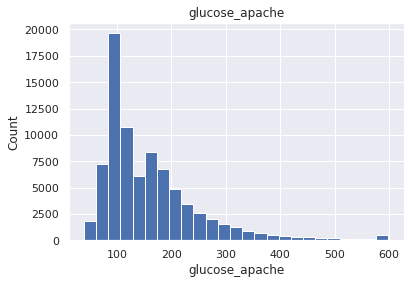

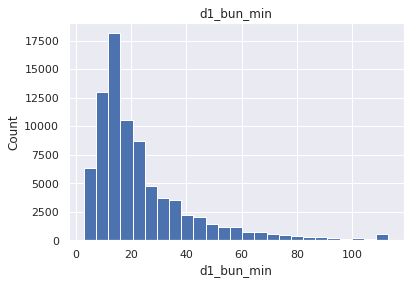

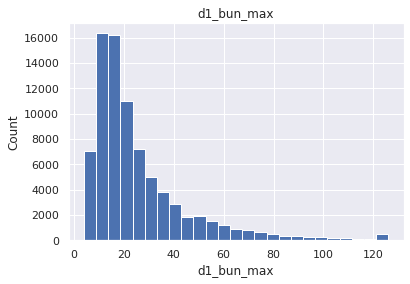

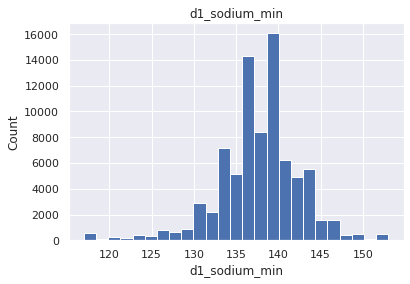

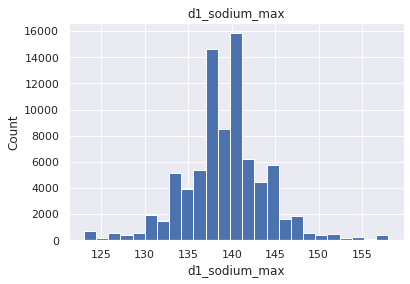

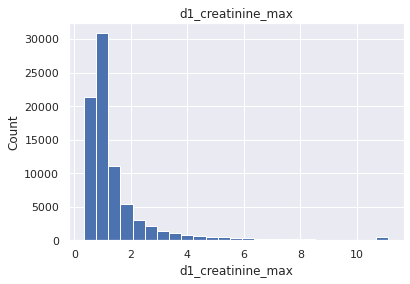

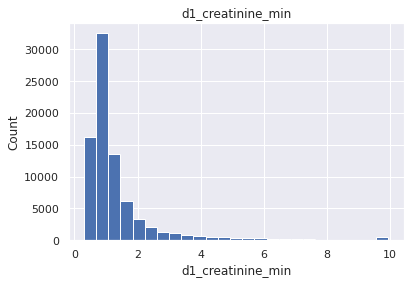

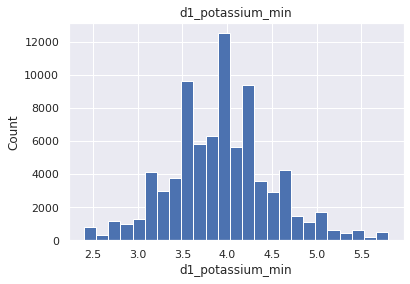

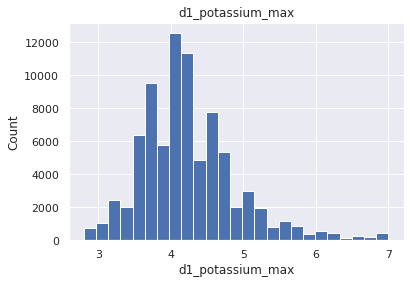

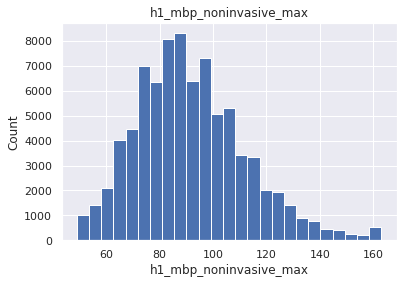

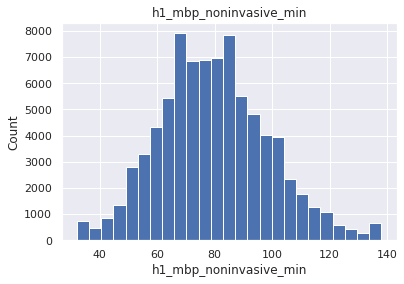

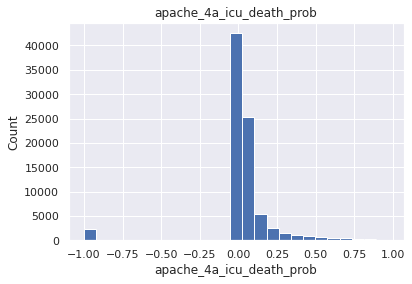

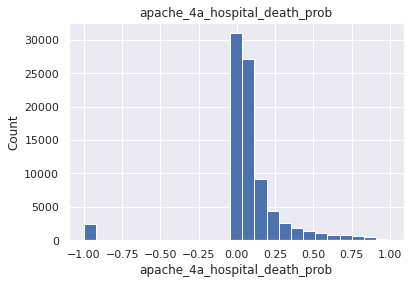

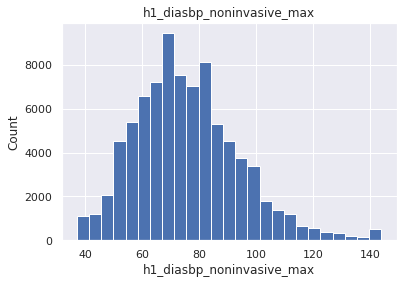

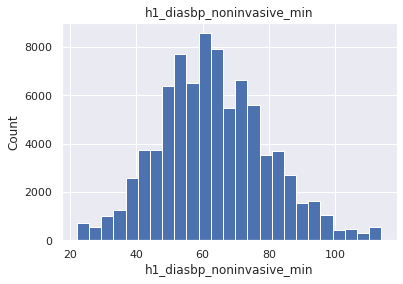

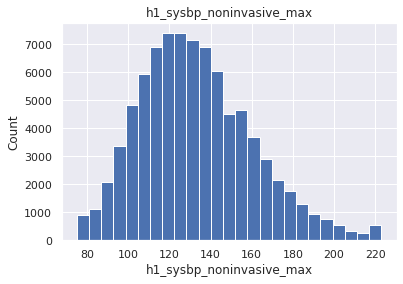

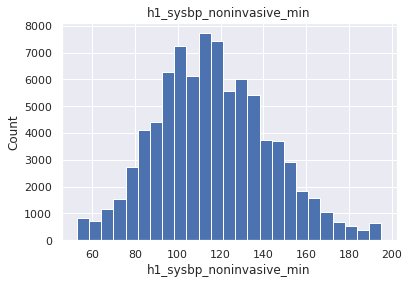

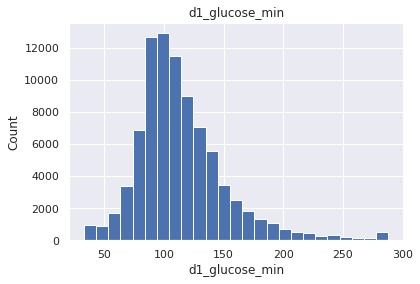

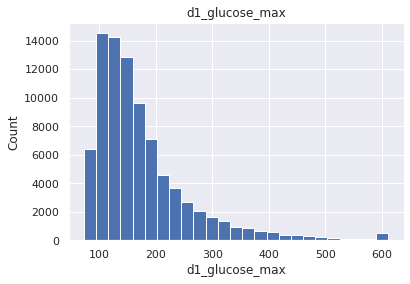

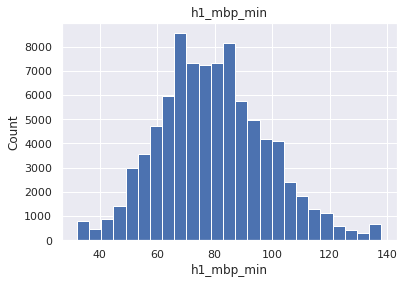

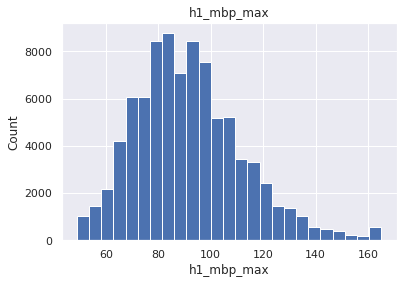

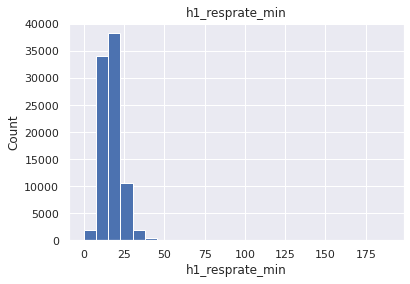

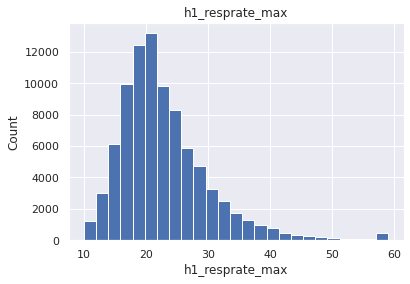

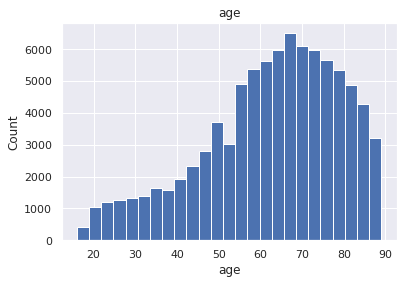

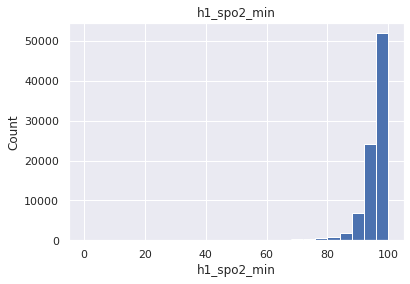

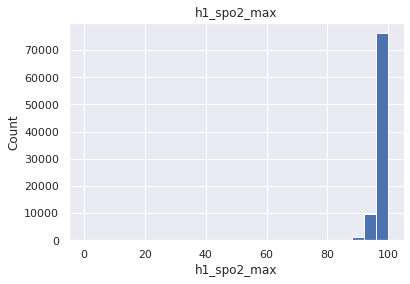

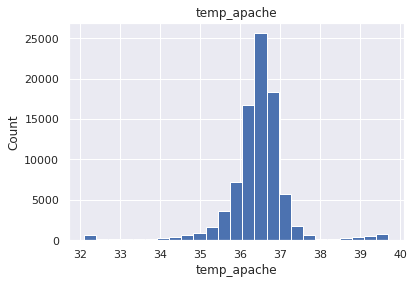

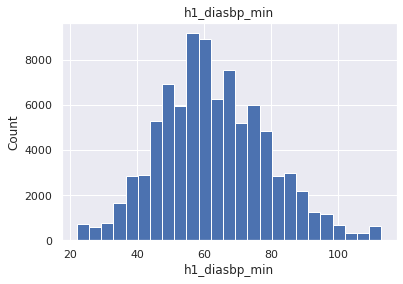

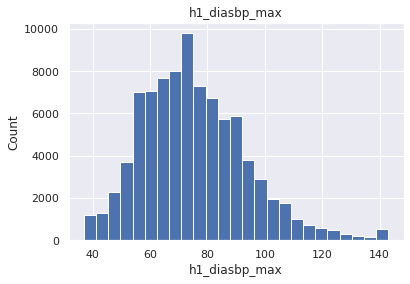

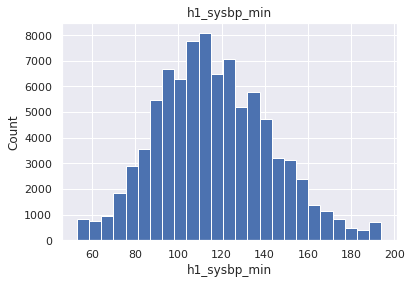

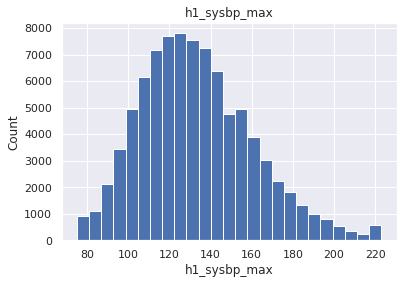

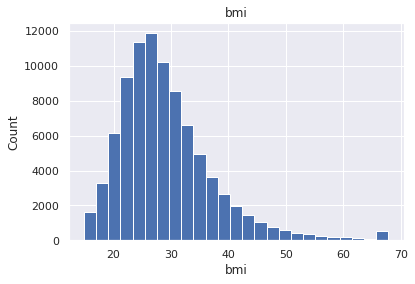

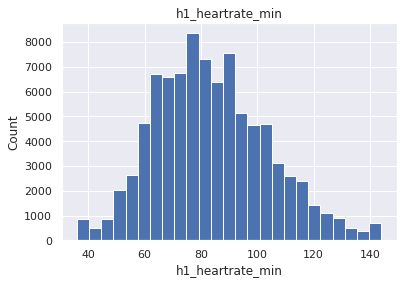

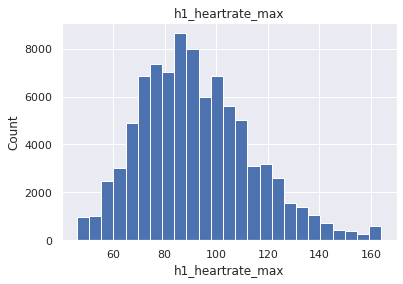

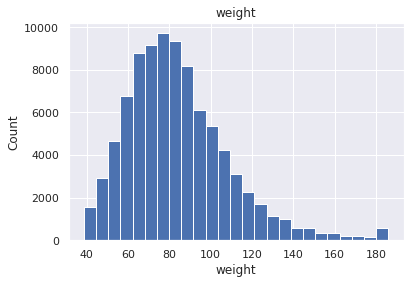

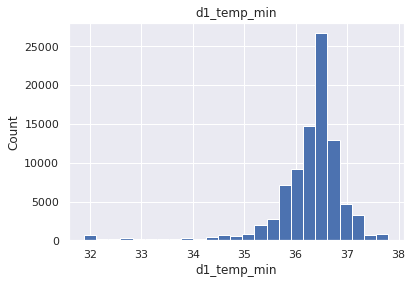

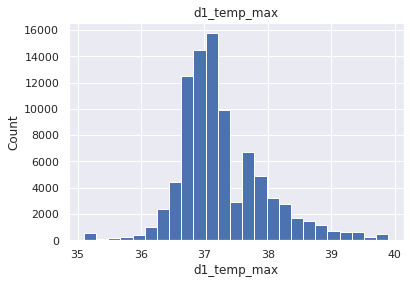

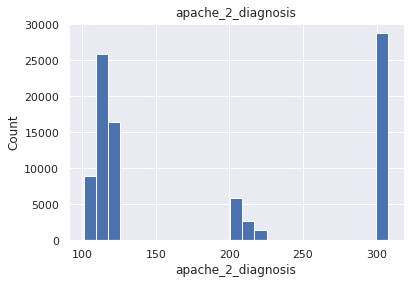

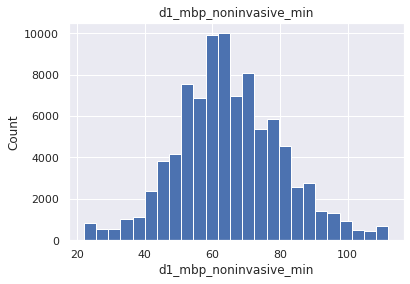

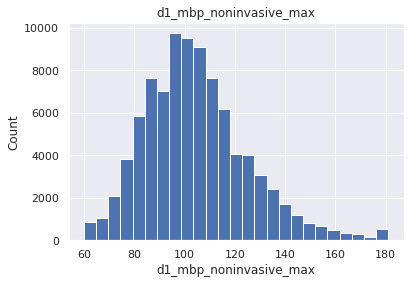

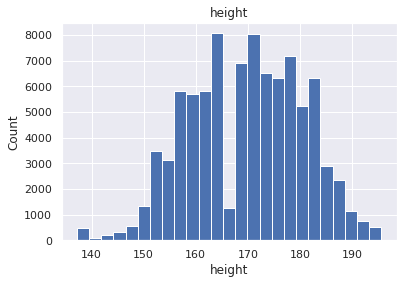

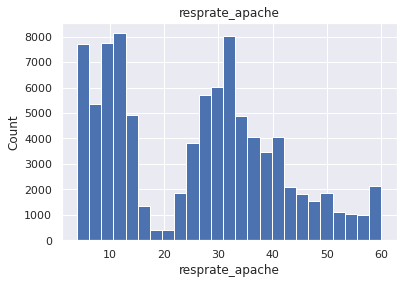

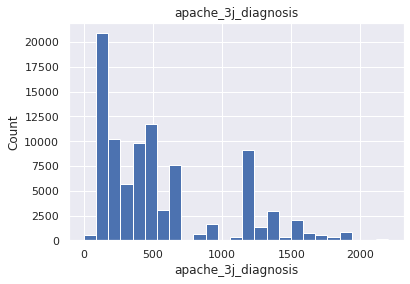

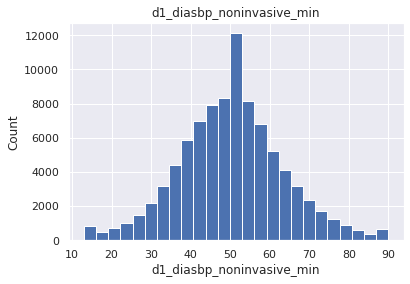

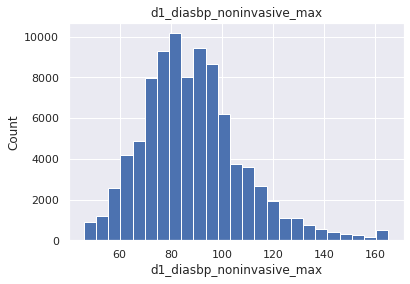

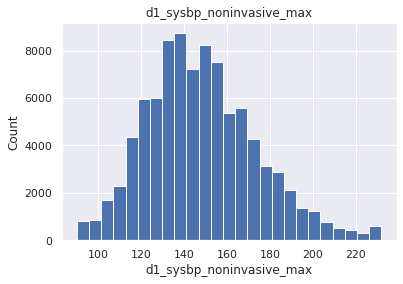

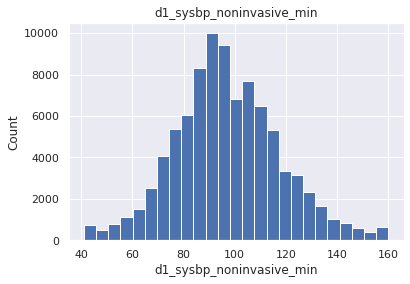

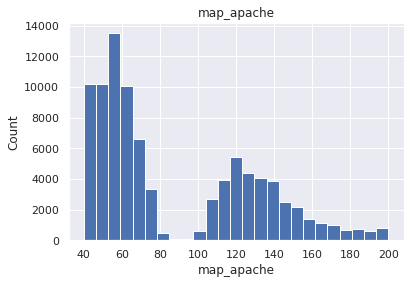

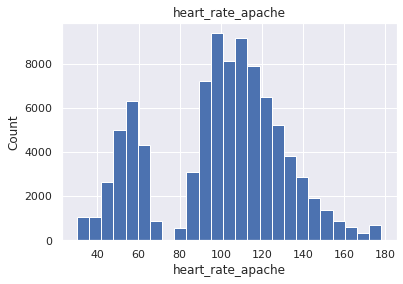

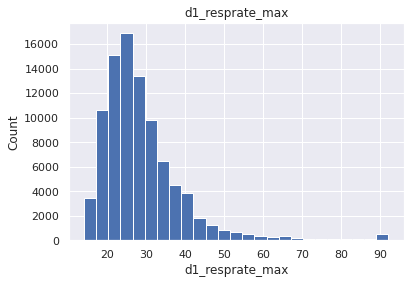

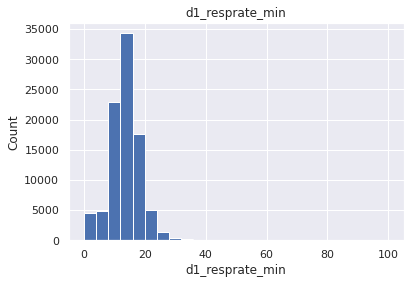

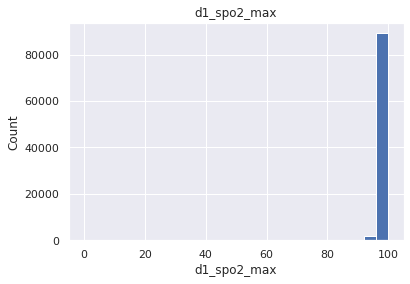

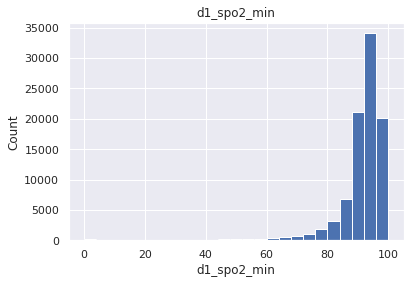

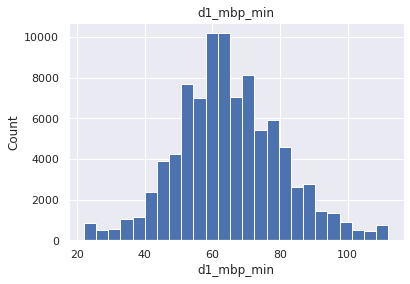

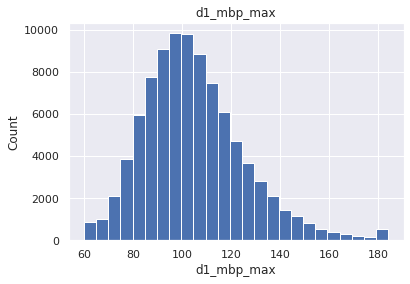

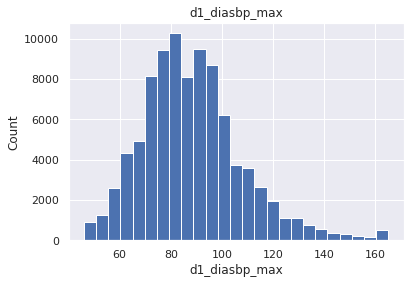

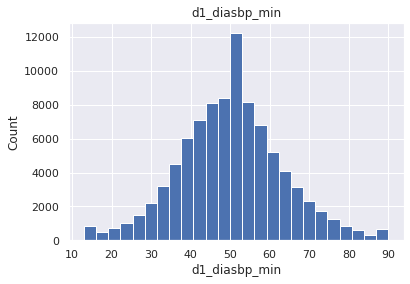

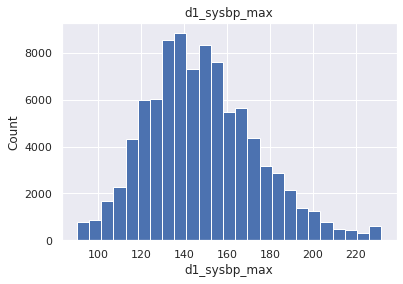

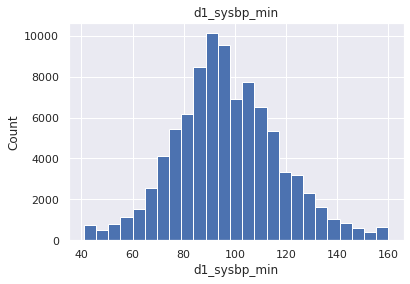

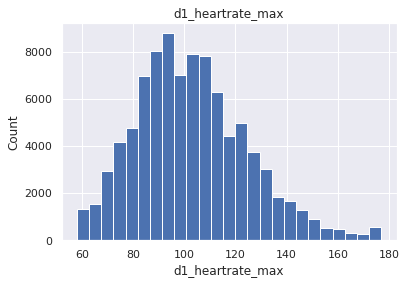

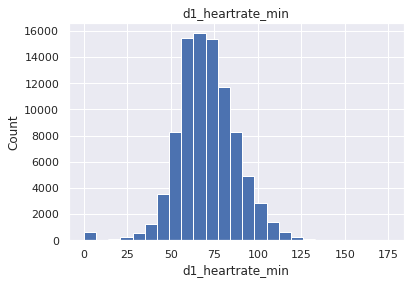

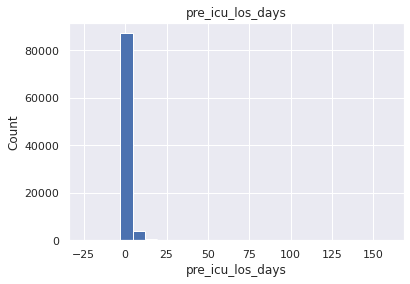

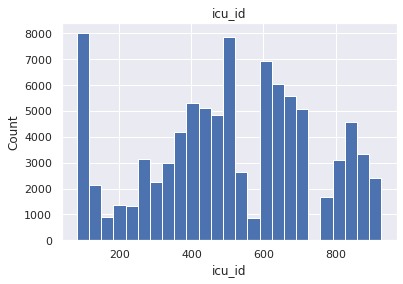

In [ ]:
## Lets analyse the continuous values by creating histograms to understand the distribution
#import matplotlib.pyplot as plt
for feature in continuous_feature:
    data=df5.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#Outliers

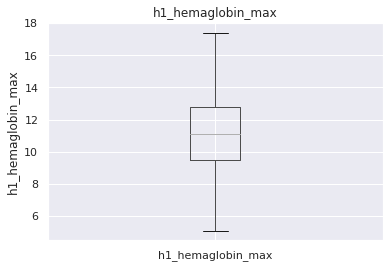

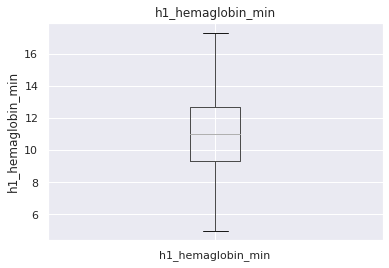

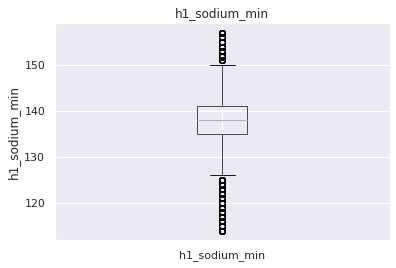

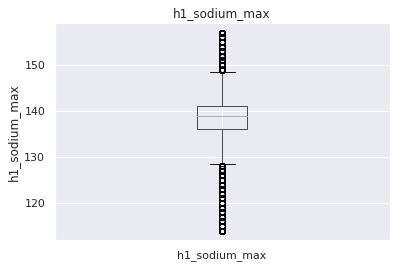

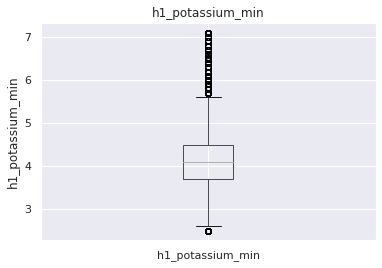

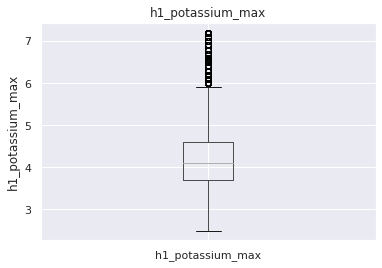

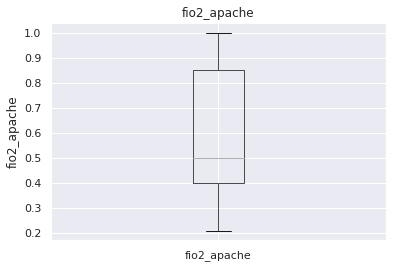

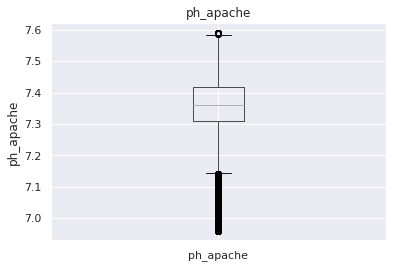

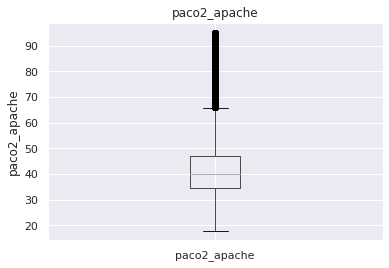

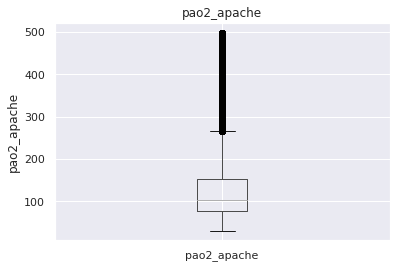

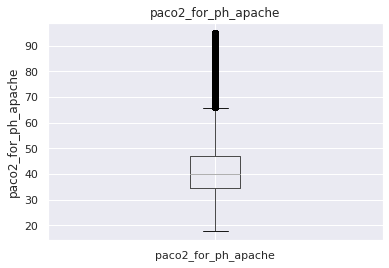

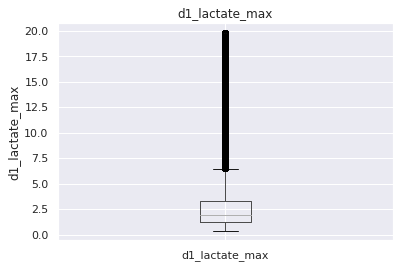

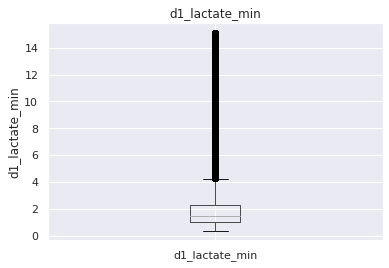

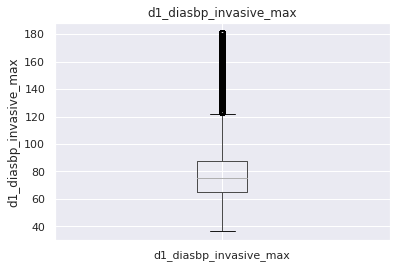

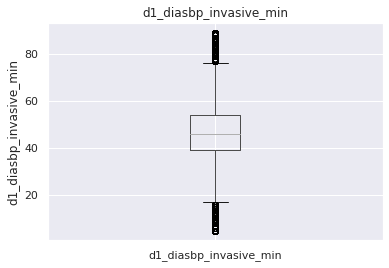

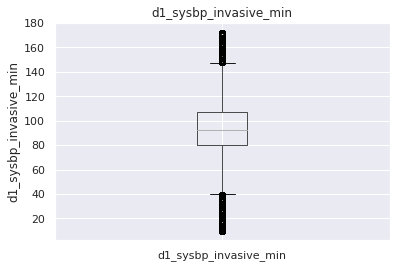

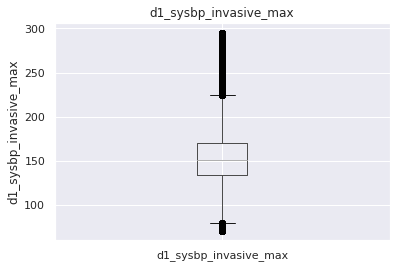

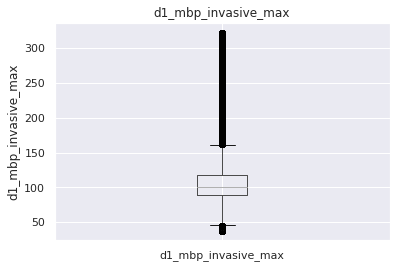

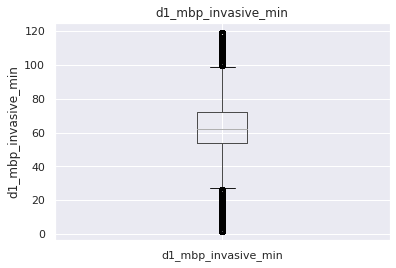

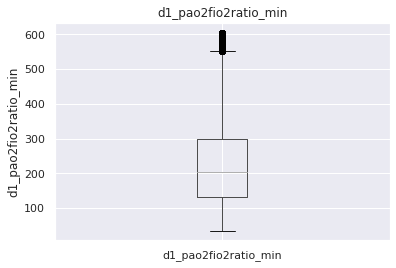

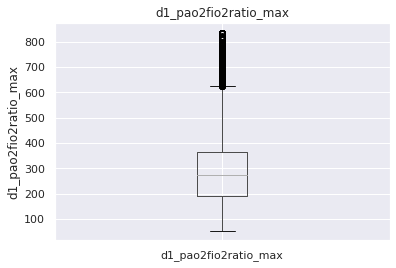

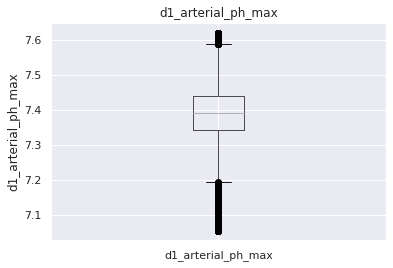

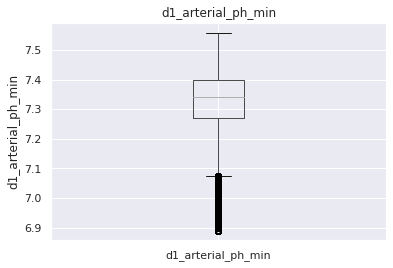

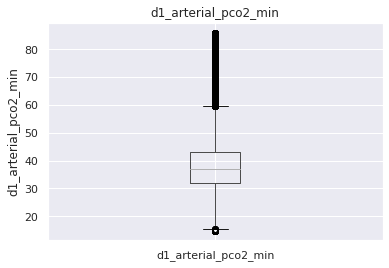

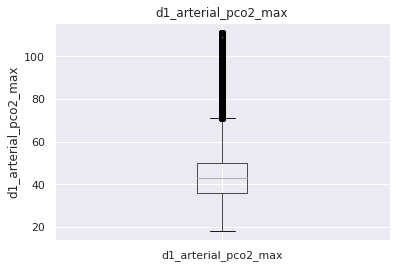

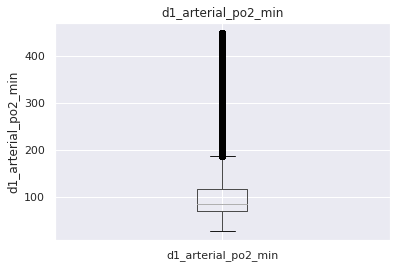

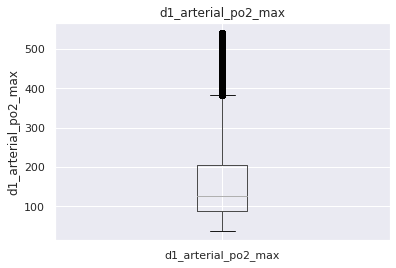

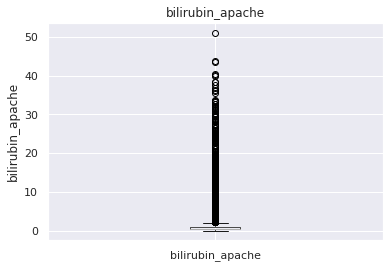

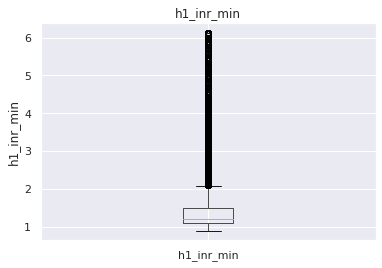

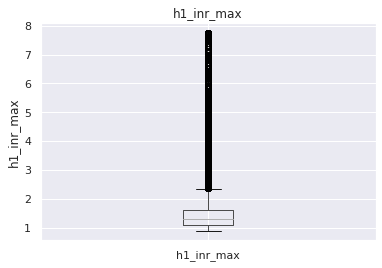

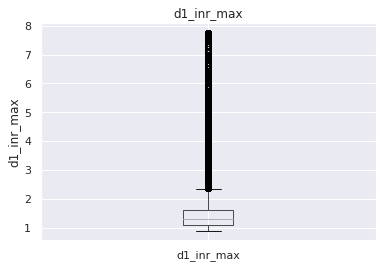

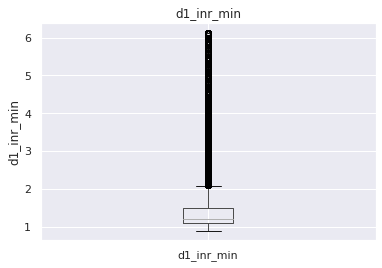

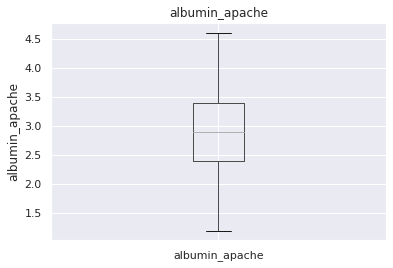

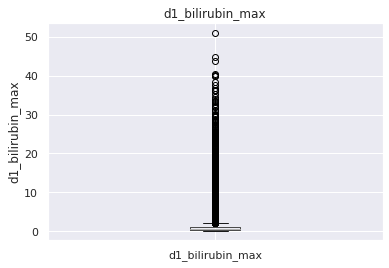

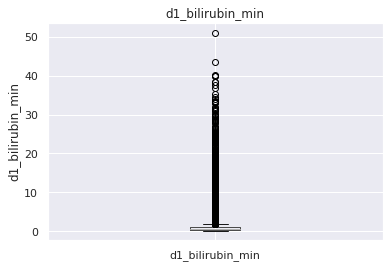

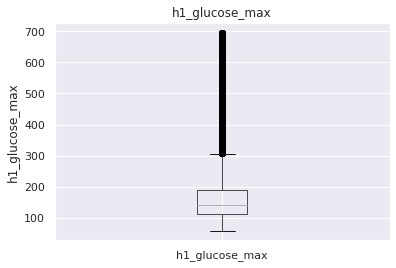

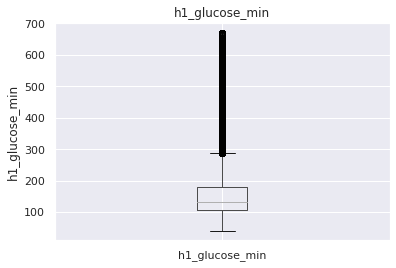

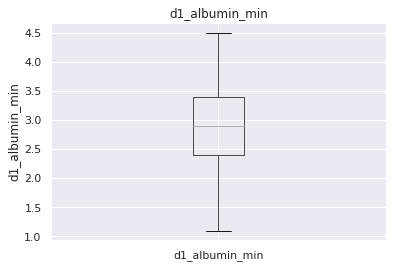

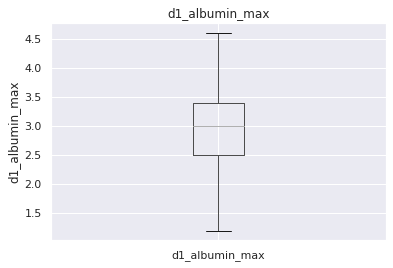

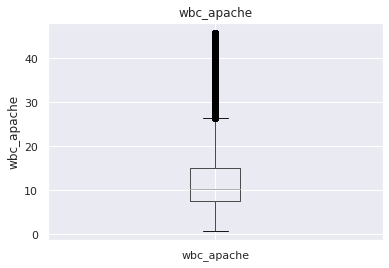

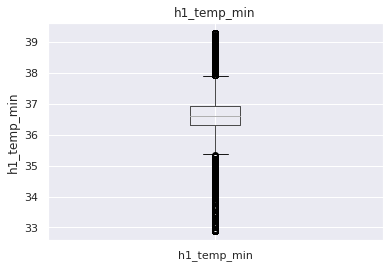

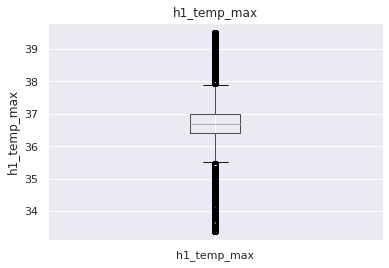

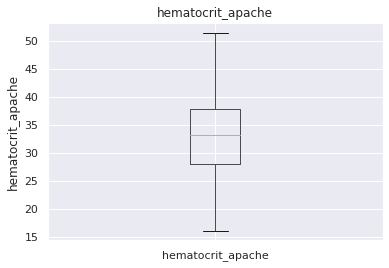

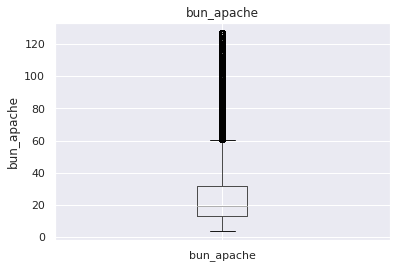

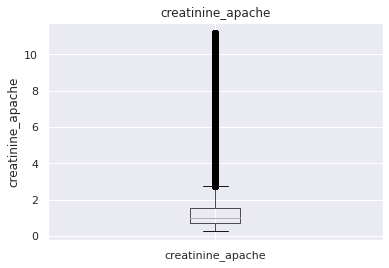

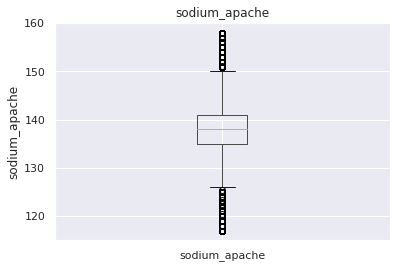

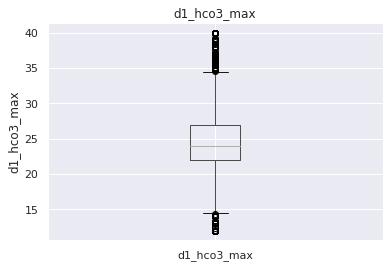

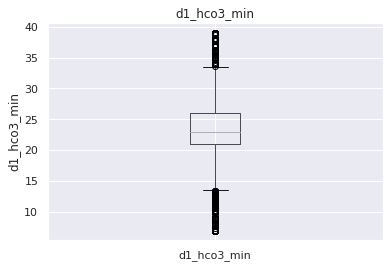

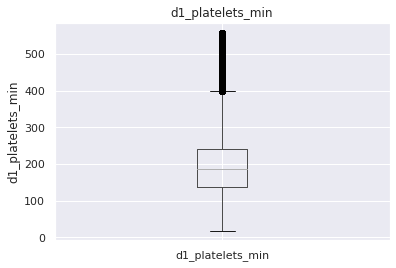

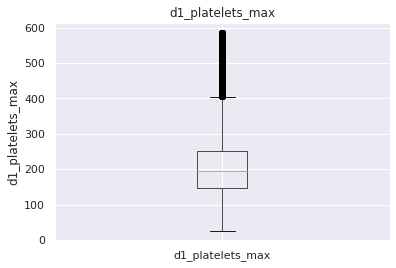

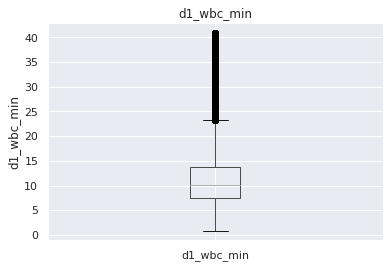

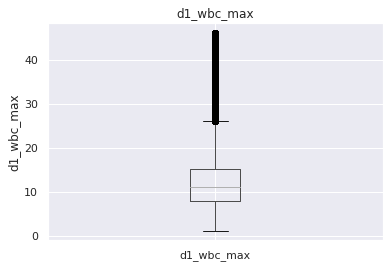

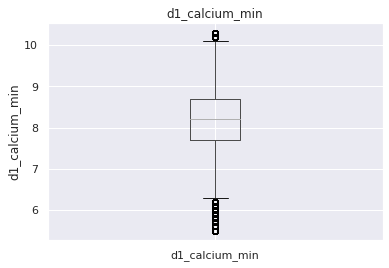

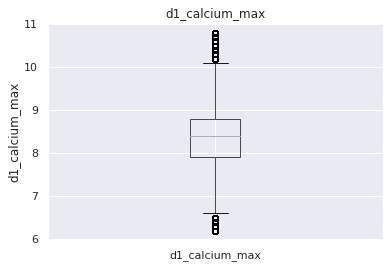

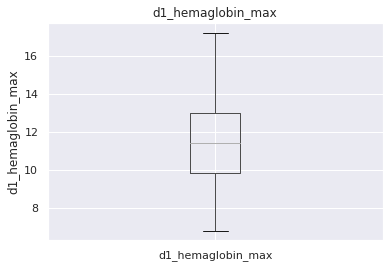

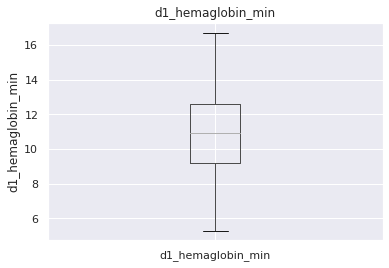

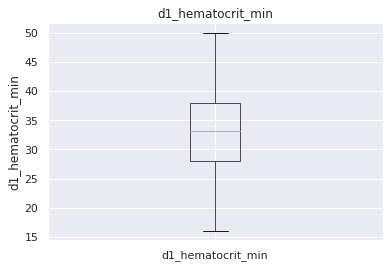

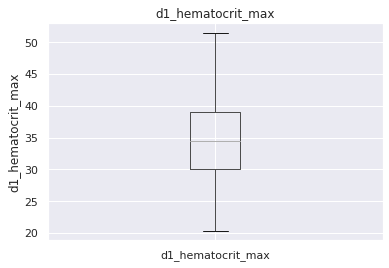

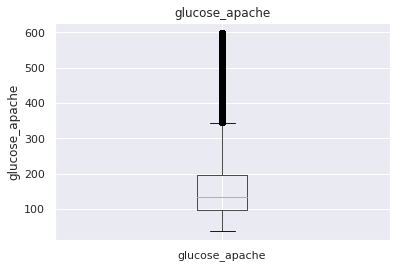

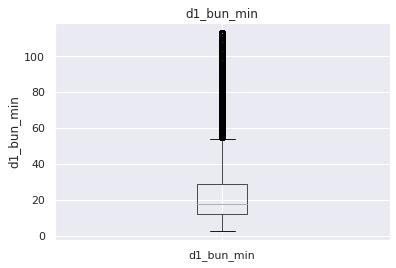

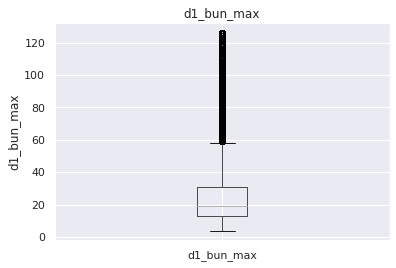

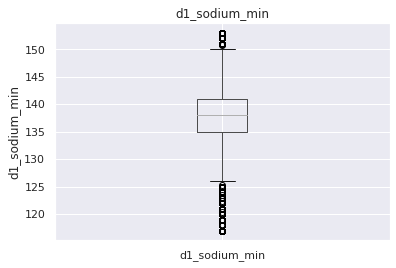

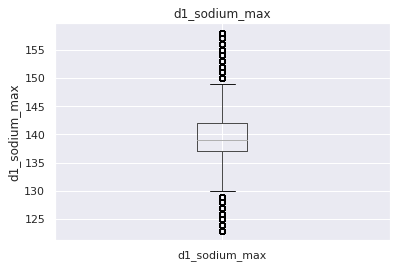

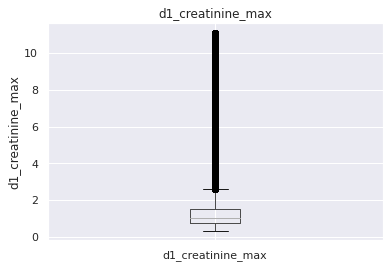

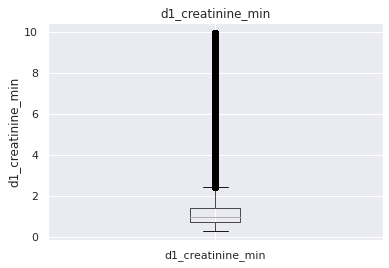

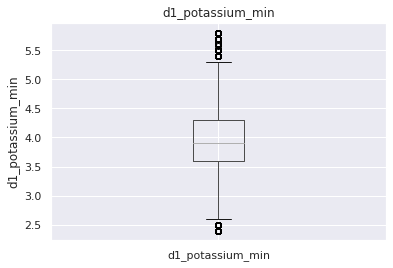

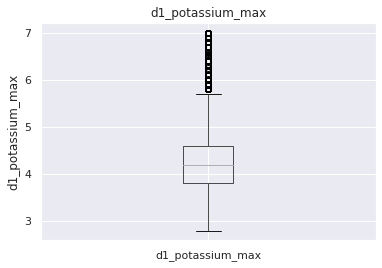

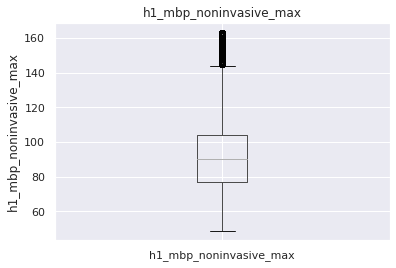

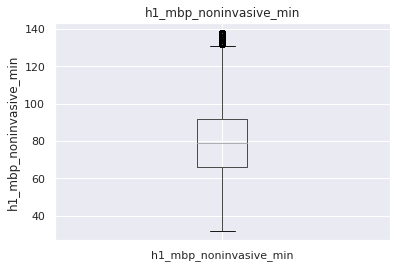

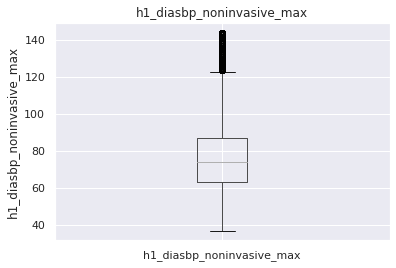

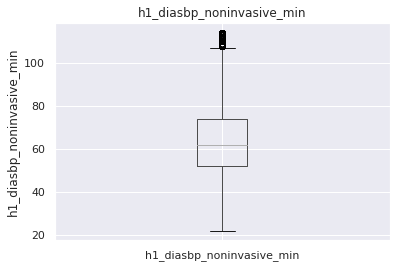

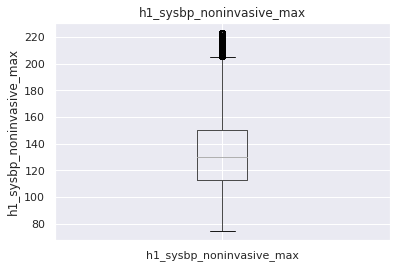

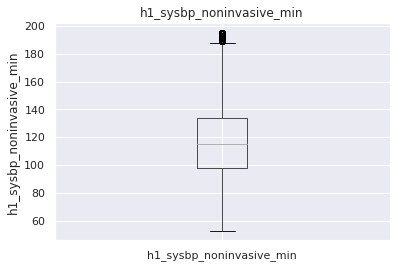

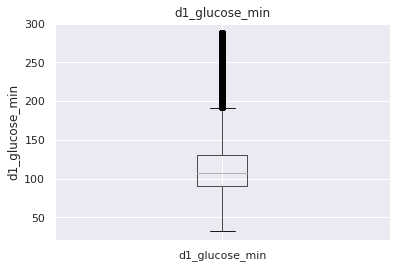

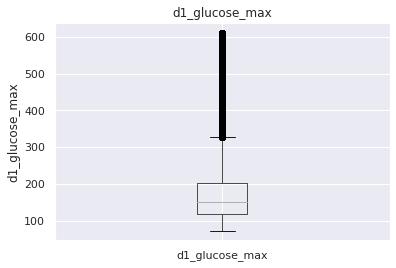

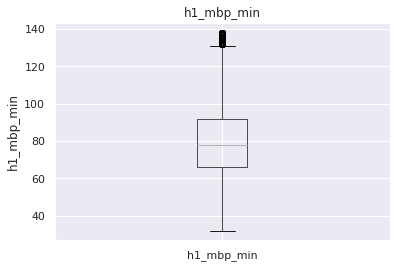

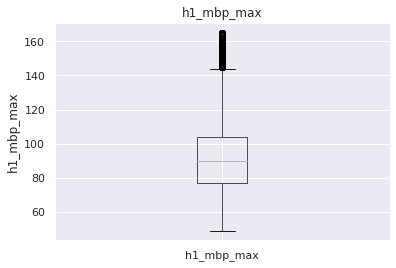

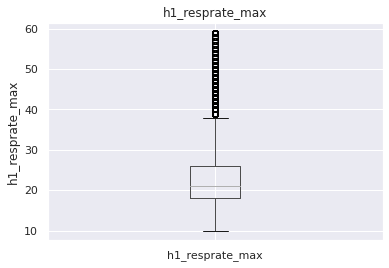

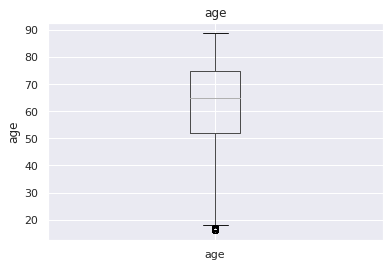

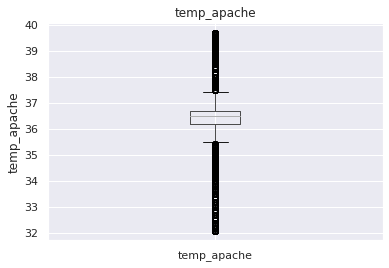

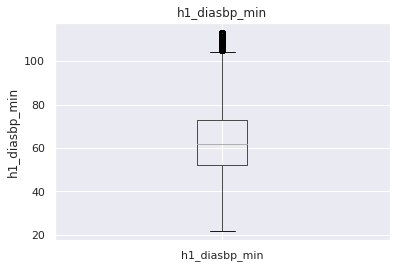

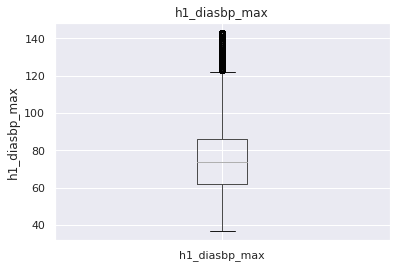

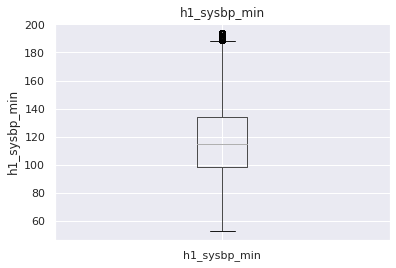

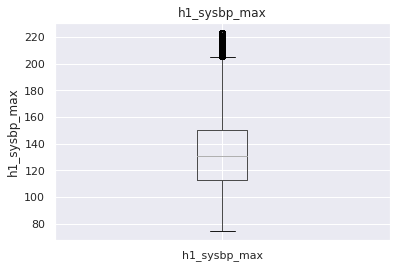

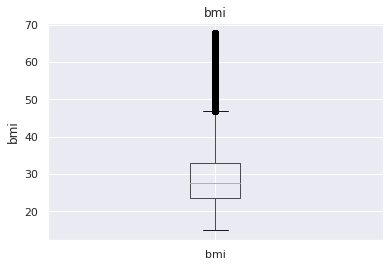

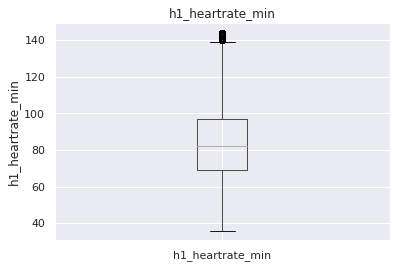

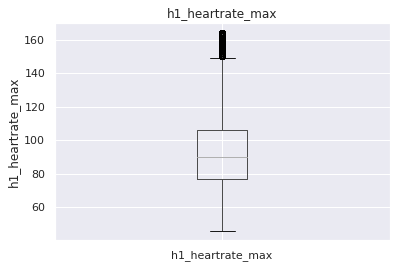

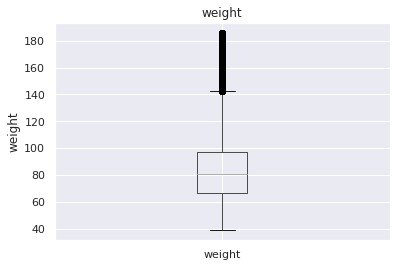

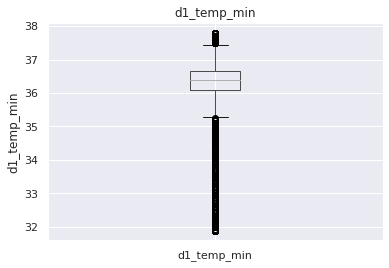

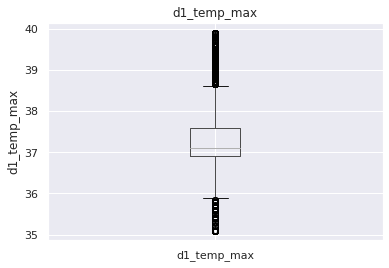

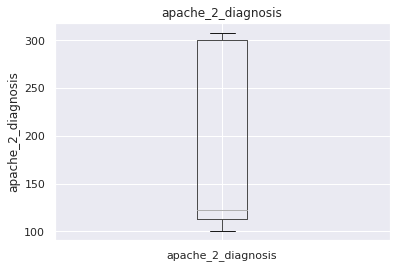

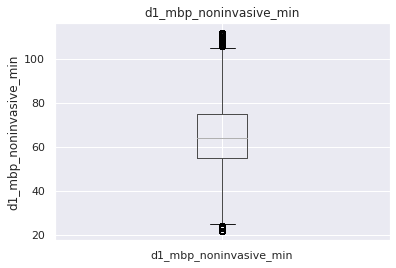

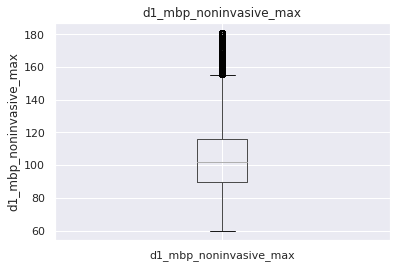

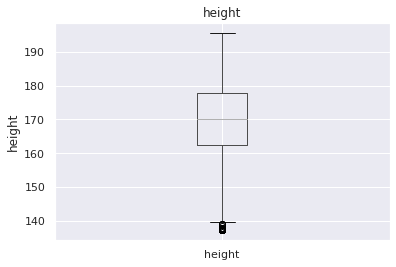

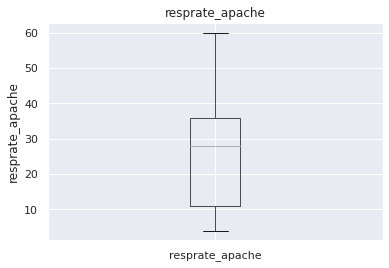

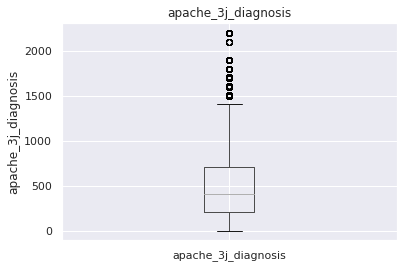

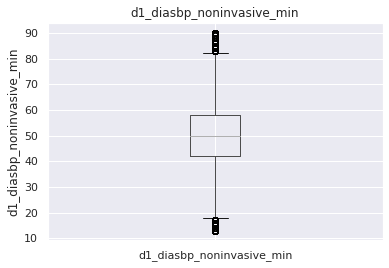

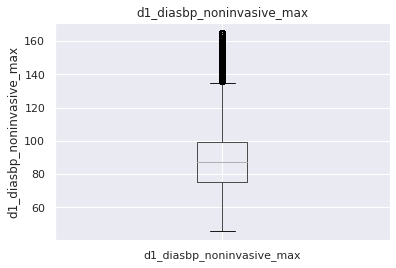

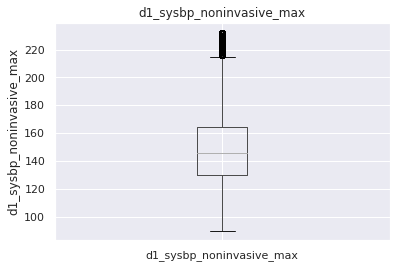

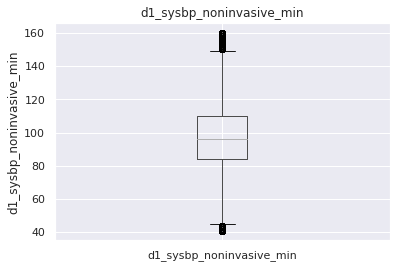

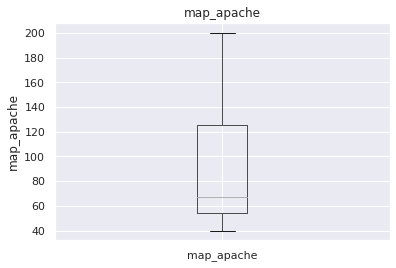

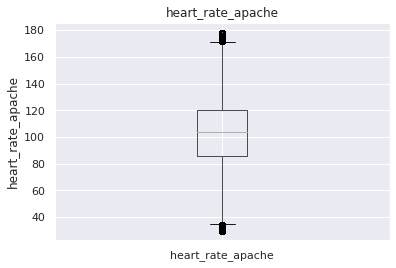

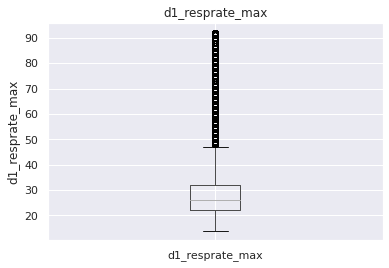

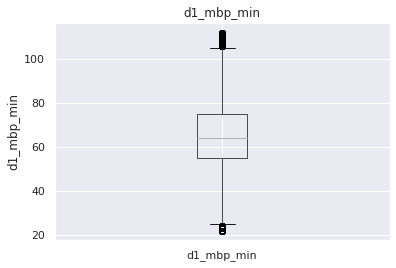

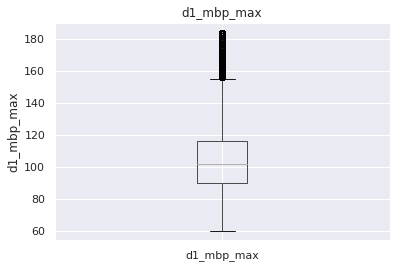

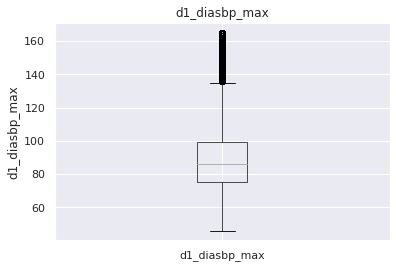

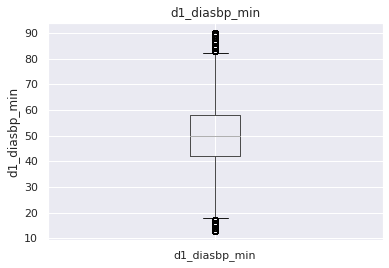

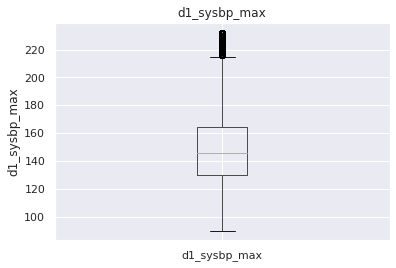

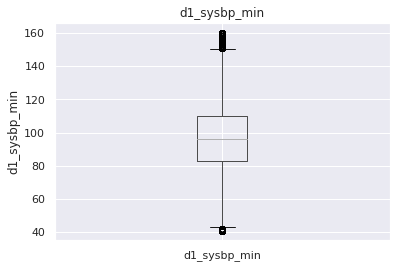

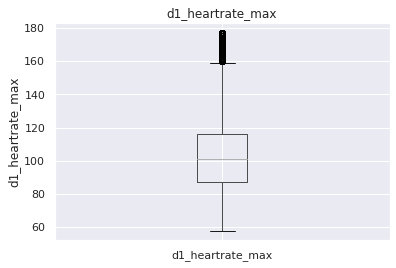

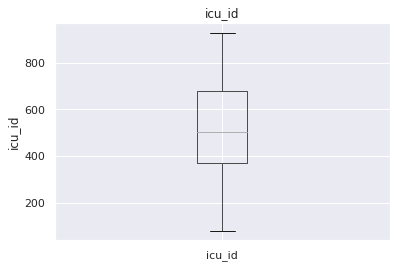

In [ ]:
for feature in continuous_feature:
    data=df5.copy()
    if 0 in data[feature].unique():
        pass
    else:
        #data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

#Categorical Variables

In [ ]:
categorical_features=[feature for feature in df5.columns if df5[feature].dtypes=='O']
categorical_features

['hospital_admit_source',
 'apache_3j_bodysystem',
 'apache_2_bodysystem',
 'ethnicity',
 'icu_admit_source',
 'gender',
 'icu_stay_type',
 'icu_type']

In [ ]:
df5[categorical_features].head()

,hospital_admit_source,apache_3j_bodysystem,apache_2_bodysystem,ethnicity,icu_admit_source,gender,icu_stay_type,icu_type
0,Floor,Sepsis,Cardiovascular,Caucasian,Floor,M,admit,CTICU
1,Floor,Respiratory,Respiratory,Caucasian,Floor,F,admit,Med-Surg ICU
2,Emergency Department,Metabolic,Metabolic,Caucasian,Accident & Emergency,F,admit,Med-Surg ICU
3,Operating Room,Cardiovascular,Cardiovascular,Caucasian,Operating Room / Recovery,F,admit,CTICU
4,NaN,Trauma,Trauma,Caucasian,Accident & Emergency,M,admit,Med-Surg ICU


In [ ]:
print("discrete_feature length",len(discrete_feature))
print("continuous_feature length",len(continuous_feature))
print("categorical_features length",len(categorical_features))


discrete_feature length 19
continuous_feature length 122
categorical_features length 8


In [ ]:
print("total features are now should be 149 lets see now the result ---->",len(discrete_feature)+len(continuous_feature)+len(categorical_features))

total features are now should be 149 lets see now the result ----> 149


In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df5[feature].unique())))

The feature is hospital_admit_source and number of categories are 16
The feature is apache_3j_bodysystem and number of categories are 12
The feature is apache_2_bodysystem and number of categories are 11
The feature is ethnicity and number of categories are 7
The feature is icu_admit_source and number of categories are 6
The feature is gender and number of categories are 3
The feature is icu_stay_type and number of categories are 3
The feature is icu_type and number of categories are 8


##will do some analysis based pn the data

In [ ]:
df5[discrete_feature].head()

,gcs_verbal_apache,gcs_motor_apache,gcs_eyes_apache,gcs_unable_apache,diabetes_mellitus,solid_tumor_with_metastasis,cirrhosis,aids,immunosuppression,leukemia,ventilated_apache,intubated_apache,arf_apache,lymphoma,hepatic_failure,elective_surgery,readmission_status,apache_post_operative,hospital_death
0,4.0,6.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0
2,5.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,5.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0,1,0
4,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [ ]:
df5[discrete_feature].isnull().sum()

gcs_verbal_apache              1901
gcs_motor_apache               1901
gcs_eyes_apache                1901
gcs_unable_apache              1037
diabetes_mellitus               715
solid_tumor_with_metastasis     715
cirrhosis                       715
aids                            715
immunosuppression               715
leukemia                        715
ventilated_apache               715
intubated_apache                715
arf_apache                      715
lymphoma                        715
hepatic_failure                 715
elective_surgery                  0
readmission_status                0
apache_post_operative             0
hospital_death                    0
dtype: int64

In [ ]:
df5.head()

,h1_hemaglobin_max,h1_hemaglobin_min,h1_sodium_min,h1_sodium_max,h1_potassium_min,h1_potassium_max,fio2_apache,ph_apache,paco2_apache,pao2_apache,paco2_for_ph_apache,d1_lactate_max,d1_lactate_min,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_sysbp_invasive_min,d1_sysbp_invasive_max,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_pao2fio2ratio_min,d1_pao2fio2ratio_max,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_pco2_min,d1_arterial_pco2_max,d1_arterial_po2_min,d1_arterial_po2_max,bilirubin_apache,h1_inr_min,h1_inr_max,d1_inr_max,d1_inr_min,albumin_apache,d1_bilirubin_max,d1_bilirubin_min,h1_glucose_max,h1_glucose_min,d1_albumin_min,d1_albumin_max,urineoutput_apache,wbc_apache,h1_temp_min,h1_temp_max,hospital_admit_source,hematocrit_apache,bun_apache,creatinine_apache,sodium_apache,d1_hco3_max,d1_hco3_min,d1_platelets_min,d1_platelets_max,d1_wbc_min,d1_wbc_max,d1_calcium_min,d1_calcium_max,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_min,d1_hematocrit_max,glucose_apache,d1_bun_min,d1_bun_max,d1_sodium_min,d1_sodium_max,d1_creatinine_max,d1_creatinine_min,d1_potassium_min,d1_potassium_max,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,apache_4a_icu_death_prob,apache_4a_hospital_death_prob,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_min,d1_glucose_max,h1_mbp_min,h1_mbp_max,h1_resprate_min,h1_resprate_max,age,h1_spo2_min,h1_spo2_max,temp_apache,h1_diasbp_min,h1_diasbp_max,h1_sysbp_min,h1_sysbp_max,bmi,h1_heartrate_min,h1_heartrate_max,weight,d1_temp_min,d1_temp_max,gcs_verbal_apache,gcs_motor_apache,gcs_eyes_apache,apache_3j_bodysystem,apache_2_bodysystem,apache_2_diagnosis,d1_mbp_noninvasive_min,d1_mbp_noninvasive_max,ethnicity,height,resprate_apache,apache_3j_diagnosis,d1_diasbp_noninvasive_min,d1_diasbp_noninvasive_max,gcs_unable_apache,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,map_apache,heart_rate_apache,diabetes_mellitus,solid_tumor_with_metastasis,cirrhosis,aids,immunosuppression,leukemia,ventilated_apache,intubated_apache,arf_apache,lymphoma,hepatic_failure,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_mbp_min,d1_mbp_max,d1_diasbp_max,d1_diasbp_min,d1_sysbp_max,d1_sysbp_min,d1_heartrate_max,d1_heartrate_min,icu_admit_source,gender,elective_surgery,pre_icu_los_days,icu_id,icu_stay_type,icu_type,readmission_status,apache_post_operative,hospital_death
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1.0,46.0,32.0,64.0,122.0,66.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,2.3,0.4,0.4,NaN,NaN,2.3,2.3,NaN,14.1,37.5,39.5,Floor,27.4,31.0,2.51,134.0,19.0,15.0,233.0,233.0,14.1,14.1,7.4,8.5,8.9,8.9,27.4,27.4,168.0,30.0,31.0,134.0,136.0,2.51,2.23,3.4,4.0,86.0,85.0,0.05,0.10,68.0,63.0,131.0,115.0,109.0,168.0,85.0,86.0,18.0,26.0,68.0,74.0,100.0,39.3,63.0,68.0,115.0,131.0,22.73,108.0,119.0,73.9,37.2,39.9,4.0,6.0,3.0,Sepsis,Cardiovascular,113.0,46.0,89.0,Caucasian,180.3,36.0,502.01,37.0,68.0,0.0,131.0,73.0,40.0,118.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,10.0,100.0,74.0,46.0,89.0,68.0,37.0,131.0,73.0,119.0,72.0,Floor,M,0,0.541667,92,admit,CTICU,0,0,0
1,11.3,11.3,145.0,145.0,4.2,4.2,1.0,7.45,37.0,51.0,37.0,3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,54.8,7.45,7.45,37.0,37.0,51.0,51.0,NaN,1.3,1.3,1.3,1.3,NaN,0.5,0.5,145.0,143.0,1.6,1.6,NaN,12.7,36.3,36.3,Floor,36.9,9.0,0.56,145.0,27.0,26.0,487.0,557.0,12.7,23.3,8.0,8.6,11.3,11.1,36.1,36.9,145.0,9.0,11.0,145.0,145.0,0.71,0.56,3.8,4.2,85.0,57.0,0.29,0.47,61.0,48.0,95.0,71.0,128.0,145.0,57.0,85.0,28.0,31.0,77.0,70.0,95.0,35.1,48.0,61.0,71.0,95.0,27.42,100.0,114.0,70.2,35.1,36.3,1.0,3.0,1.0,Respiratory,Respiratory,108.0,38.0,120.0,Caucasian,160.0,33.0,203.01,31.0,95.0,0.0,159.0,67.0,46.0,120.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32.0,12.0,100.0,70.0,38.0,120.0,95.0,31.0,159.0,67.0,118.0,72.0,Floor,F,0,0.927778,90,admit,Med-Surg ICU,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
#sns.barplot(x="hospital_death",y='elective_surgery',data=df5)

##from above obeservation we can see that patients who have got "elective_surgery" are having maximum survival cases that death


In [ ]:
df5.columns

Index(['h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_sodium_min',
       'h1_sodium_max', 'h1_potassium_min', 'h1_potassium_max', 'fio2_apache',
       'ph_apache', 'paco2_apache', 'pao2_apache',
       ...
       'icu_admit_source', 'gender', 'elective_surgery', 'pre_icu_los_days',
       'icu_id', 'icu_stay_type', 'icu_type', 'readmission_status',
       'apache_post_operative', 'hospital_death'],
      dtype='object', length=149)

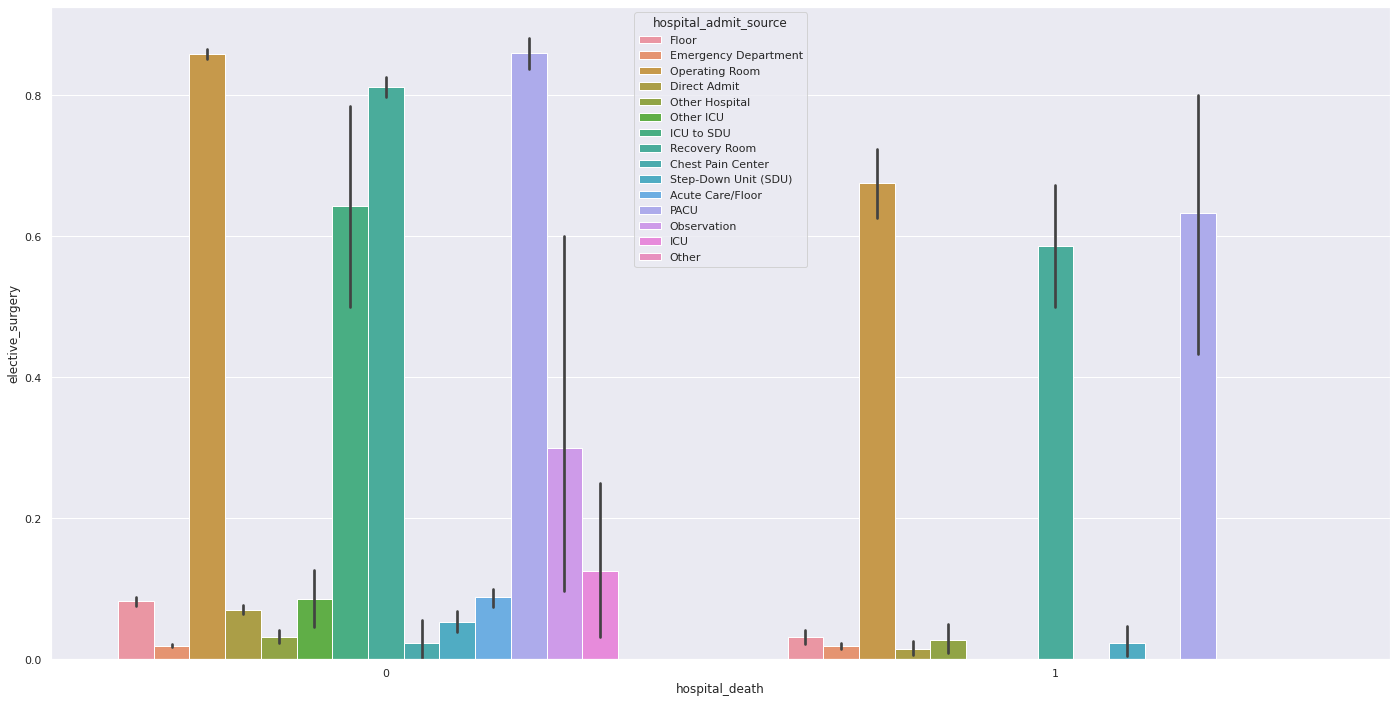

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (24, 12)
#sns.barplot(y="hospital_death",hue='hospital_admit_source',x='elective_surgery',data=dataset)
sns.barplot(x="hospital_death",hue='hospital_admit_source',y='elective_surgery',data=df5)

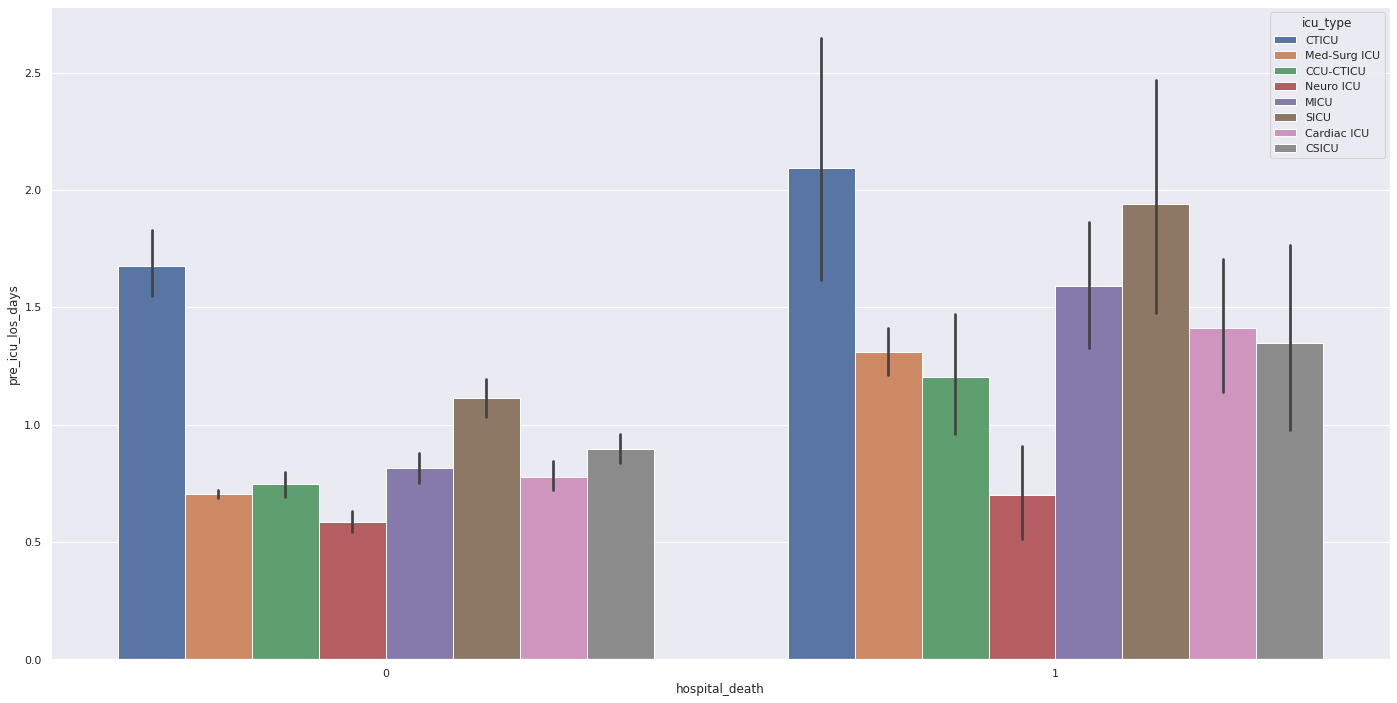

In [ ]:
#sns.barplot(y="hospital_death",hue='hospital_admit_source',x='elective_surgery',data=dataset)
sns.barplot(x="hospital_death",hue='icu_type',y='pre_icu_los_days',data=df5)

## from above observation we can see patients deaths have happened
1. Deaths: 
* CTICU- more than 1.5% 
* SICU- more than 1.5% 

In [ ]:
df5.tail()

,h1_hemaglobin_max,h1_hemaglobin_min,h1_sodium_min,h1_sodium_max,h1_potassium_min,h1_potassium_max,fio2_apache,ph_apache,paco2_apache,pao2_apache,paco2_for_ph_apache,d1_lactate_max,d1_lactate_min,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_sysbp_invasive_min,d1_sysbp_invasive_max,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_pao2fio2ratio_min,d1_pao2fio2ratio_max,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_pco2_min,d1_arterial_pco2_max,d1_arterial_po2_min,d1_arterial_po2_max,bilirubin_apache,h1_inr_min,h1_inr_max,d1_inr_max,d1_inr_min,albumin_apache,d1_bilirubin_max,d1_bilirubin_min,h1_glucose_max,h1_glucose_min,d1_albumin_min,d1_albumin_max,urineoutput_apache,wbc_apache,h1_temp_min,h1_temp_max,hospital_admit_source,hematocrit_apache,bun_apache,creatinine_apache,sodium_apache,d1_hco3_max,d1_hco3_min,d1_platelets_min,d1_platelets_max,d1_wbc_min,d1_wbc_max,d1_calcium_min,d1_calcium_max,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_min,d1_hematocrit_max,glucose_apache,d1_bun_min,d1_bun_max,d1_sodium_min,d1_sodium_max,d1_creatinine_max,d1_creatinine_min,d1_potassium_min,d1_potassium_max,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,apache_4a_icu_death_prob,apache_4a_hospital_death_prob,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_min,d1_glucose_max,h1_mbp_min,h1_mbp_max,h1_resprate_min,h1_resprate_max,age,h1_spo2_min,h1_spo2_max,temp_apache,h1_diasbp_min,h1_diasbp_max,h1_sysbp_min,h1_sysbp_max,bmi,h1_heartrate_min,h1_heartrate_max,weight,d1_temp_min,d1_temp_max,gcs_verbal_apache,gcs_motor_apache,gcs_eyes_apache,apache_3j_bodysystem,apache_2_bodysystem,apache_2_diagnosis,d1_mbp_noninvasive_min,d1_mbp_noninvasive_max,ethnicity,height,resprate_apache,apache_3j_diagnosis,d1_diasbp_noninvasive_min,d1_diasbp_noninvasive_max,gcs_unable_apache,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,map_apache,heart_rate_apache,diabetes_mellitus,solid_tumor_with_metastasis,cirrhosis,aids,immunosuppression,leukemia,ventilated_apache,intubated_apache,arf_apache,lymphoma,hepatic_failure,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_mbp_min,d1_mbp_max,d1_diasbp_max,d1_diasbp_min,d1_sysbp_max,d1_sysbp_min,d1_heartrate_max,d1_heartrate_min,icu_admit_source,gender,elective_surgery,pre_icu_los_days,icu_id,icu_stay_type,icu_type,readmission_status,apache_post_operative,hospital_death
91708,13.2,13.2,140.0,140.0,4.2,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.34,7.34,48.0,48.0,144.0,144.0,NaN,1.1,1.1,1.1,1.1,NaN,NaN,NaN,208.0,208.0,NaN,NaN,NaN,NaN,38.2,38.2,Acute Care/Floor,NaN,NaN,NaN,NaN,28.0,28.0,92.0,92.0,5.68,5.68,8.2,8.2,13.2,13.2,39.0,39.0,381.0,27.0,27.0,140.0,140.0,1.1,1.1,4.2,4.2,64.0,55.0,0.05,0.12,55.0,44.0,94.0,87.0,187.0,400.0,55.0,64.0,16.0,24.0,75.0,97.0,98.0,36.6,44.0,55.0,87.0,94.0,23.060250,96.0,111.0,72.9,36.6,38.2,5.0,6.0,4.0,Sepsis,Cardiovascular,113.0,48.0,109.0,Caucasian,177.8,9.0,501.06,44.0,104.0,0.0,128.0,67.0,48.0,115.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,27.0,9.0,100.0,85.0,48.0,109.0,104.0,44.0,128.0,67.0,115.0,70.0,Floor,M,0,0.298611,927,admit,Cardiac ICU,0,0,0
91709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,1.4,94.0,34.0,81.0,131.0,166.0,30.0,63.0,187.0,7.26,7.15,58.0,85.0,63.0,187.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.22,36.1,36.1,Emergency Department,33.0,34.0,2.3,136.0,30.0,30.0,133.0,133.0,4.22,4.22,7.8,7.8,10.5,10.5,33.0,33.0,177.0,34.0,34.0,136.0,136.0,2.3,2.3,3.8,3.8,78.0,68.0,0.02,0.03,64.0,56.0,127.0,107.0,177.0,177.0,68.0,78.0,22.0,28.0,56.0,96.0,99.0,37.4,56.0,64.0,107.0,127.0,47.179671,83.0,89.0,158.0,36.1,37.4,5.0,6.0,4.0,Sepsis,Cardiovascular,113.0,47.0,82.0,Caucasian,183.0,33.0,501.05,40.0,73.0,0.0,127.0,65.0,62.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,12.0,100.0,45.0,47.0,82.0,73.0,40.0,127.0,65.0,100.0,76.0,Floor,F,0,0.120139,925,admit,Med-Surg ICU,0,0,0
91710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.36

In [ ]:
df5['hospital_id'].unique()

KeyError: ignored

## I want to know that which hospital_id  has more deaths

In [264]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (24, 12)
sns.barplot(x="hospital_id",y="hospital_death",data=df5)

ValueError: ignored

In [ ]:
df5.hospital_id.value_counts().index

In [ ]:
hospital_id_values=df5.hospital_id.value_counts().values
hospital_id_values

array([4333, 3925, 3095, 2792, 2754, 2730, 2583, 2470, 2258, 2225, 2141,
       1909, 1744, 1510, 1442, 1402, 1386, 1349, 1322, 1312, 1284, 1261,
       1260, 1081, 1045, 1042, 1032, 1029,  978,  944,  942,  902,  897,
        894,  877,  839,  820,  799,  792,  765,  740,  736,  734,  729,
        716,  710,  673,  645,  641,  611,  611,  580,  563,  546,  542,
        529,  522,  516,  515,  492,  474,  460,  459,  450,  448,  438,
        422,  414,  412,  388,  381,  369,  367,  323,  311,  310,  308,
        307,  303,  293,  284,  280,  274,  272,  271,  238,  236,  221,
        220,  215,  213,  200,  195,  193,  187,  179,  176,  174,  173,
        172,  168,  160,  157,  151,  150,  143,  133,  129,  127,  127,
        121,  119,  111,  110,  109,  108,  108,   92,   84,   81,   77,
         61,   53,   50,   50,   46,   43,   36,   34,   34,   29,   22,
         19,   17,   16,   15,   15,   13,   12,   10,   10,    9,    7,
          7,    6,    6,    2])

In [ ]:
hospital_id_labels=dataset.hospital_id.value_counts().index
hospital_id_labels

Int64Index([118,  19, 188, 161,  70, 196, 176,  21, 194, 174,
            ...
             74,  84,  38, 167, 124,  23,   4,  93,  95, 130],
           dtype='int64', length=147)

([<matplotlib.patches.Wedge at 0x7f082b62e610>,
 [Text(0.7620081168603567, 0.7933118112312038, '118'),
  Text(-0.7656869322357379, 0.7897616867153183, '19'),
  Text(-0.9631322996951684, -0.5313907914933194, '188'),
  Text(0.03056811697220321, -1.0995751862536614, '161'),
  Text(0.9589540083894299, -0.5388944328844428, '70')],
 [Text(0.41564079101474, 0.43271553339883834, '25.64%'),
  Text(-0.41764741758312973, 0.430779101844719, '23.23%'),
  Text(-0.5253448907428191, -0.2898495226327196, '18.31%'),
  Text(0.016673518348474477, -0.5997682834110879, '16.52%'),
  Text(0.5230658227578708, -0.2939424179369688, '16.30%')])

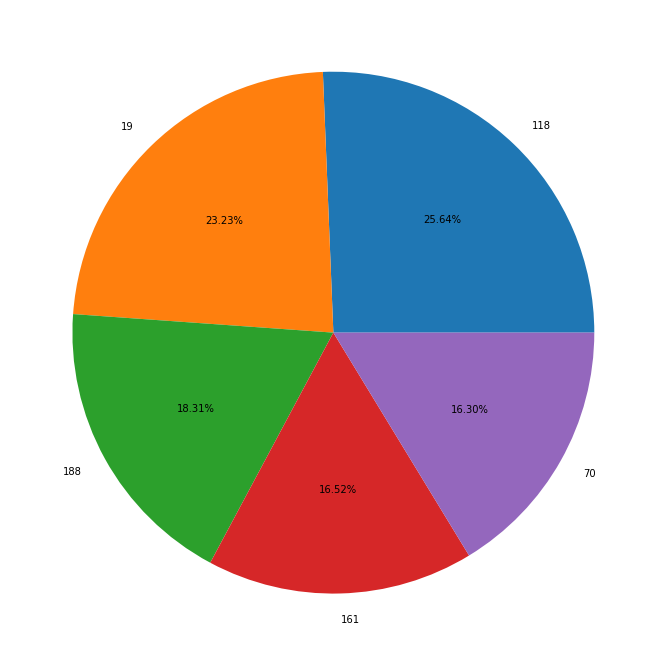

In [ ]:
plt.pie(hospital_id_values[:5],labels=hospital_id_labels[:5],autopct='%1.2f%%')

##These above hospital ids are the top most 5 hospitals

In [ ]:
dataset.head()

,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.

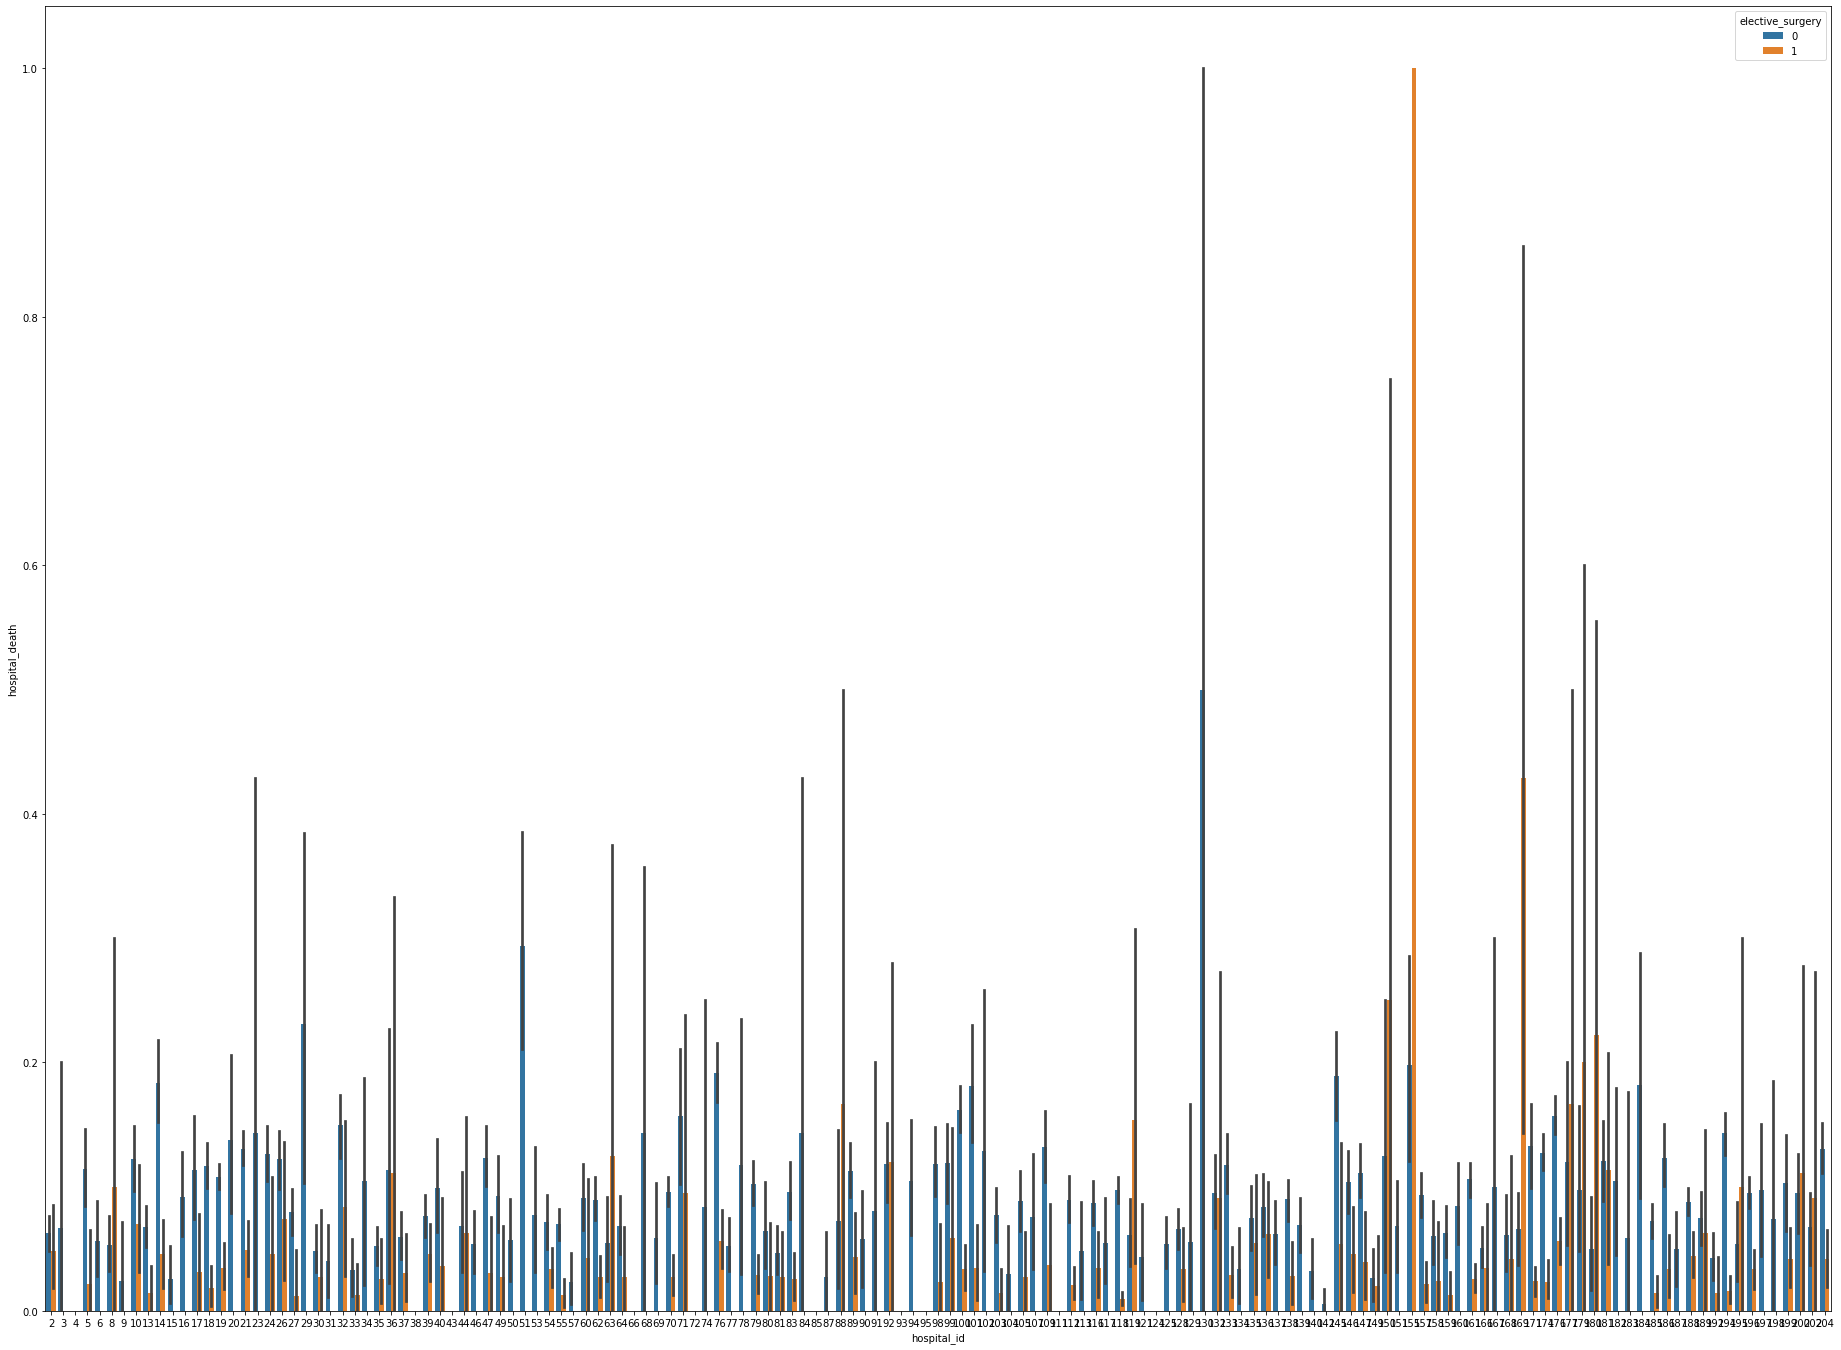

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (32, 24)
sns.barplot(x="hospital_id",y="hospital_death",hue='elective_surgery',data=dataset)

In [ ]:
from pandas_profiling import ProfileReport
import sklearn

ImportError: ignored

#Feature Engg part 2

In [ ]:
## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['hospital_death'],test_size=0.1,random_state=0)

In [ ]:
X_train.shape, X_test.shape

#Handling Missing Values For Categorical

In [ ]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)*100))

In [ ]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

In [ ]:
dataset.head()


#Handling Numerical Missing Values

In [ ]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)*100))

In [ ]:
print("numerical_with_nan length is ",len(numerical_with_nan))

In [ ]:
## We will print the discrete_feature nan variables and percentage of missing values
print("discrete_feature length is", len(discrete_feature))
print("\n")
for feature in discrete_feature:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)*100))

In [ ]:
#;ets fill the missing values for Discrete feature before contunuous features
# in that case first we have to use meam mode methods so lets check outleies how much percentages present
for feature in discrete_feature :
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        #data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [ ]:
for feature in discrete_feature :
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        #data[feature]=np.log(data[feature])
        data[feature].fillna(data[feature].median())

In [ ]:
for feature in discrete_feature:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)*100))

In [ ]:
dataset[discrete_feature]